In [25]:
import os
import pandas as pd

In [26]:
folder_path = 'Forecasts'  # Replace with your folder path
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


In [27]:
districts = ['AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD', 'BEED',
       'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI',
       'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR',
       'MUMBAI', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD',
       'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI',
       'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM',
       'YAVATMAL', 'MUMBAI SUBURBAN']

In [33]:
dfs = []  # list to collect all df_req

for f in csv_files:
    df = pd.read_csv(f"{folder_path}/{f}")
    model = f.split('_')[0]
    
    try:
        df_req = df[['district', 'date', 'actual', 'forecast']]
    except KeyError:
        if model == 'bayesian':
            df_req = df[['district', 'date', 'actual', 'forecast_mean']]
            df_req = df_req.rename(columns={'forecast_mean': 'forecast'})  # optional: standardize column name
    df_req['model'] = model 
    dfs.append(df_req)  # collect the processed df_req

# After the loop, concatenate all collected dfs
final_df = pd.concat(dfs, ignore_index=True)

            
        
    # print(df_req.shape)

C:\Users\nauti\AppData\Local\Temp\ipykernel_45332\2311738704.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req['model'] = model
C:\Users\nauti\AppData\Local\Temp\ipykernel_45332\2311738704.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req['model'] = model


In [35]:
final_df.columns

Index(['district', 'date', 'actual', 'forecast', 'model'], dtype='object')

In [36]:
final_df = final_df[['model','district', 'date', 'actual', 'forecast']]

In [37]:
final_df['model'] = final_df['model'].str.upper()  # Convert district names to uppercase

In [43]:
ahmadnagar = final_df[(final_df.model == "ANN")&(final_df.district == "AHMEDNAGAR")]

<Axes: xlabel='date'>

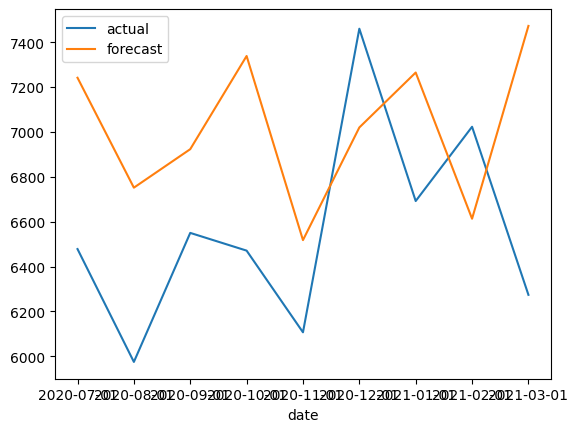

In [46]:
ahmadnagar = ahmadnagar.set_index('date')
ahmadnagar.plot()

In [48]:
final_df.columns

Index(['model', 'district', 'date', 'actual', 'forecast'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# make sure 'date' column is datetime and data is sorted
final_df['date'] = pd.to_datetime(final_df['date'])
final_df = final_df.sort_values(by=['district', 'date'])

# Define model groups
groups = {
    'Statistical': ['arima', 'sarima', 'holtwinters', 'bayesian', 'prophet'],
    'Ensemble': ['rf', 'xgb', 'lgbm', 'catboost', 'stacking'],
    'Deep Learning': ['lstm', 'gru', 'cnn', 'tcn', 'transformer'],
    'Regression': ['knn', 'ridge', 'lasso', 'svr', 'mlp']
}


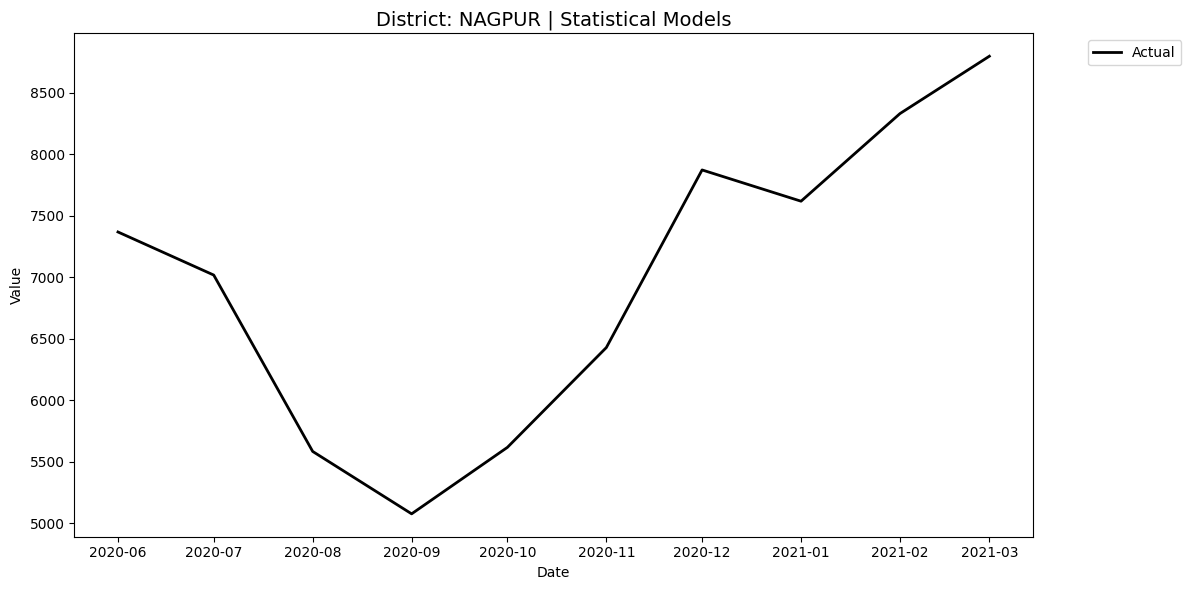

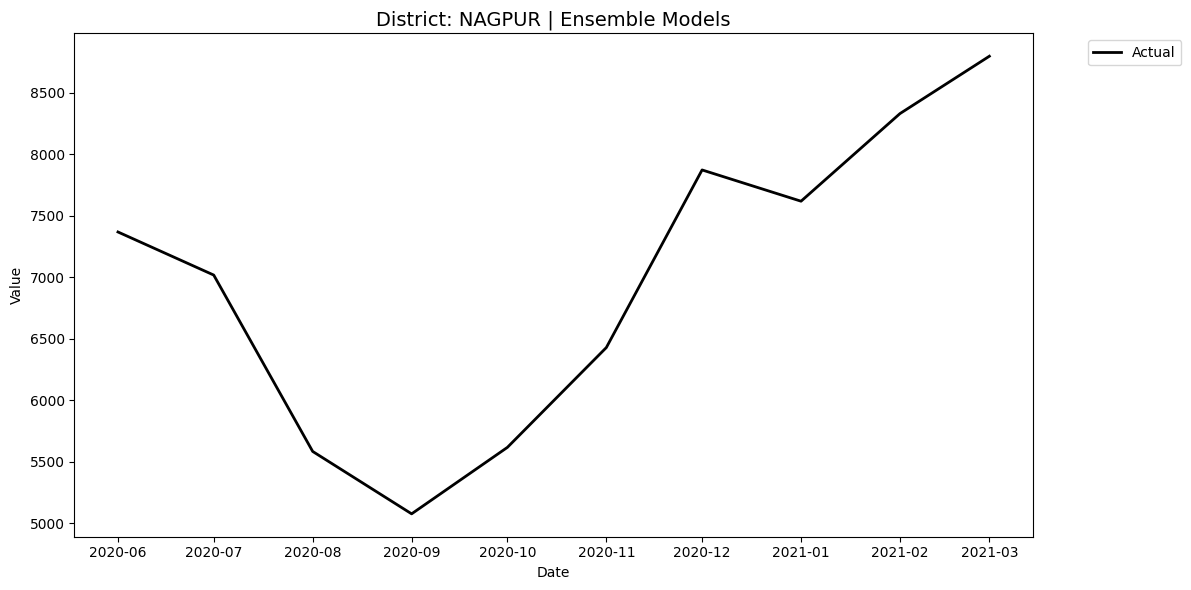

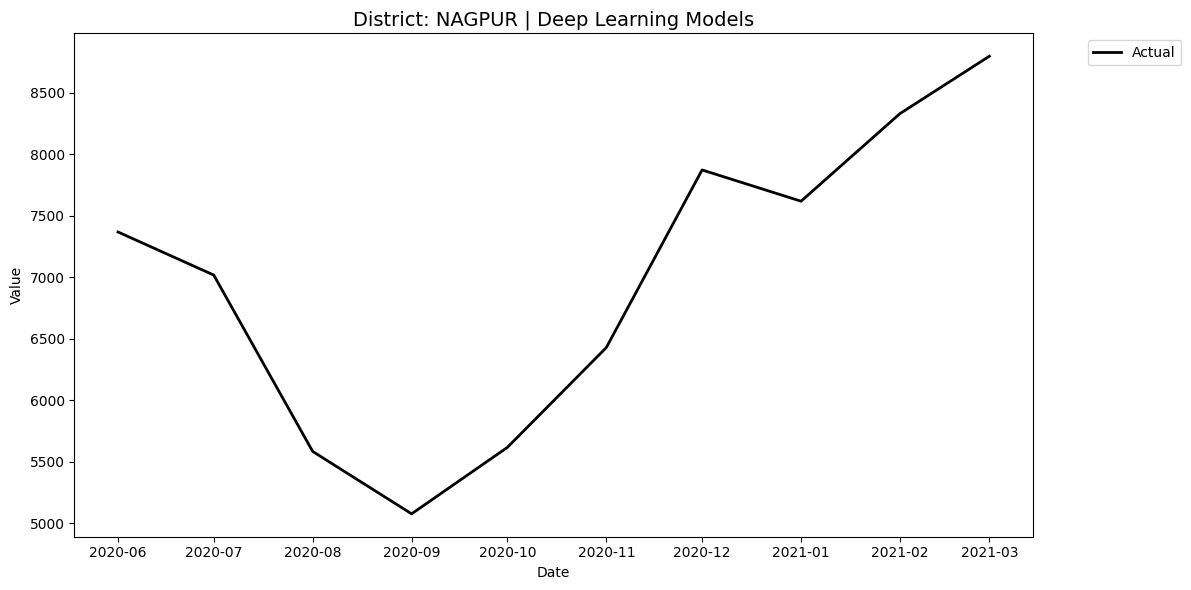

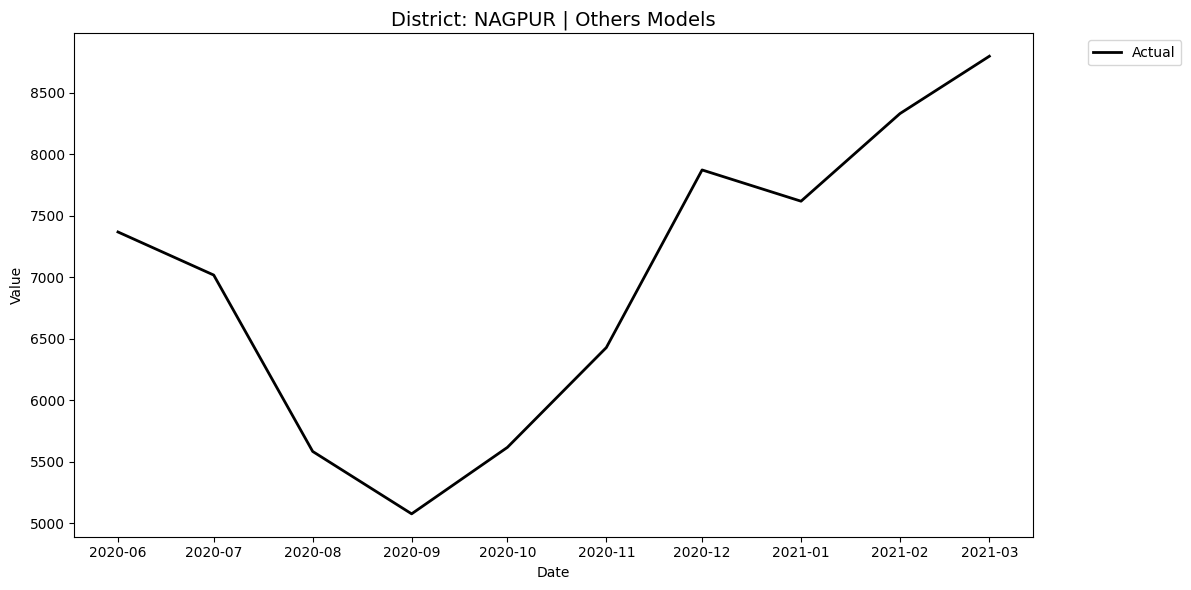

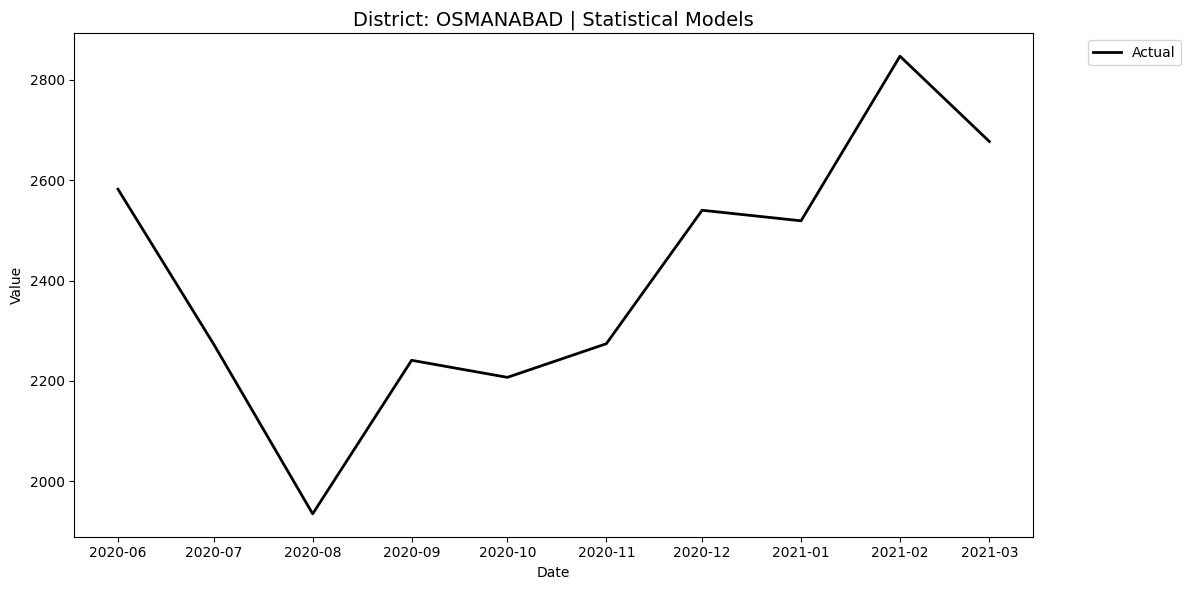

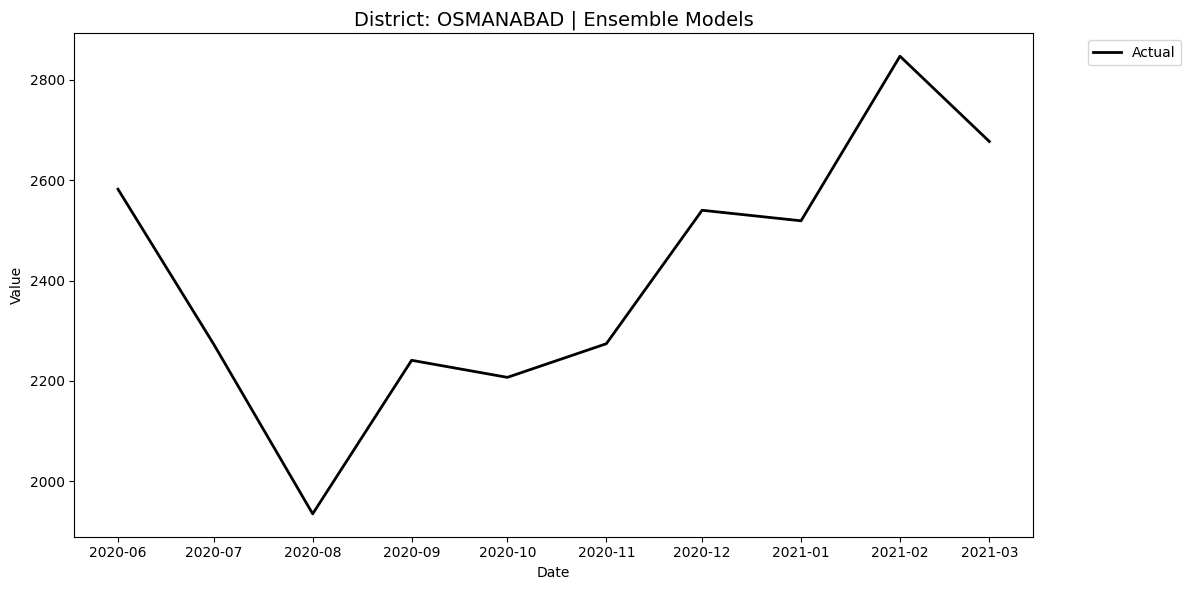

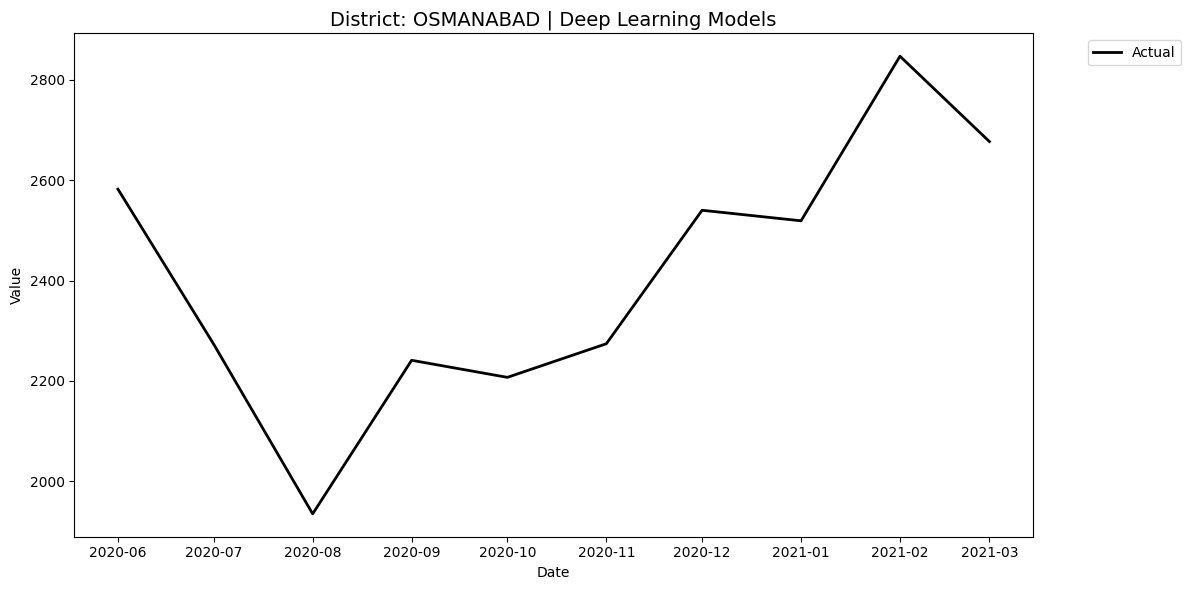

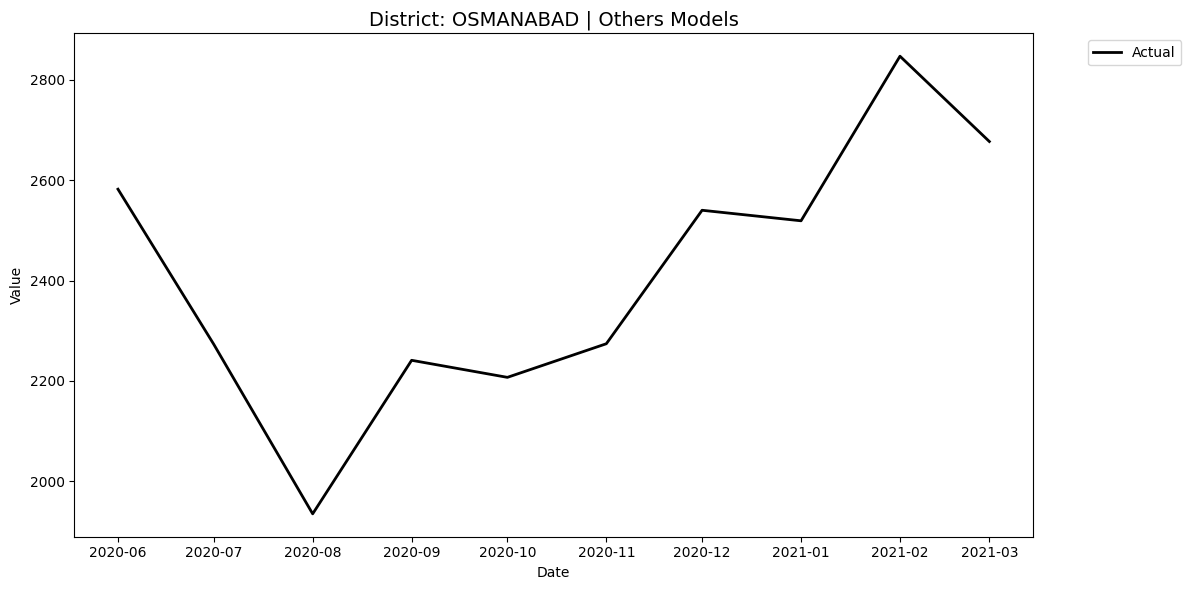

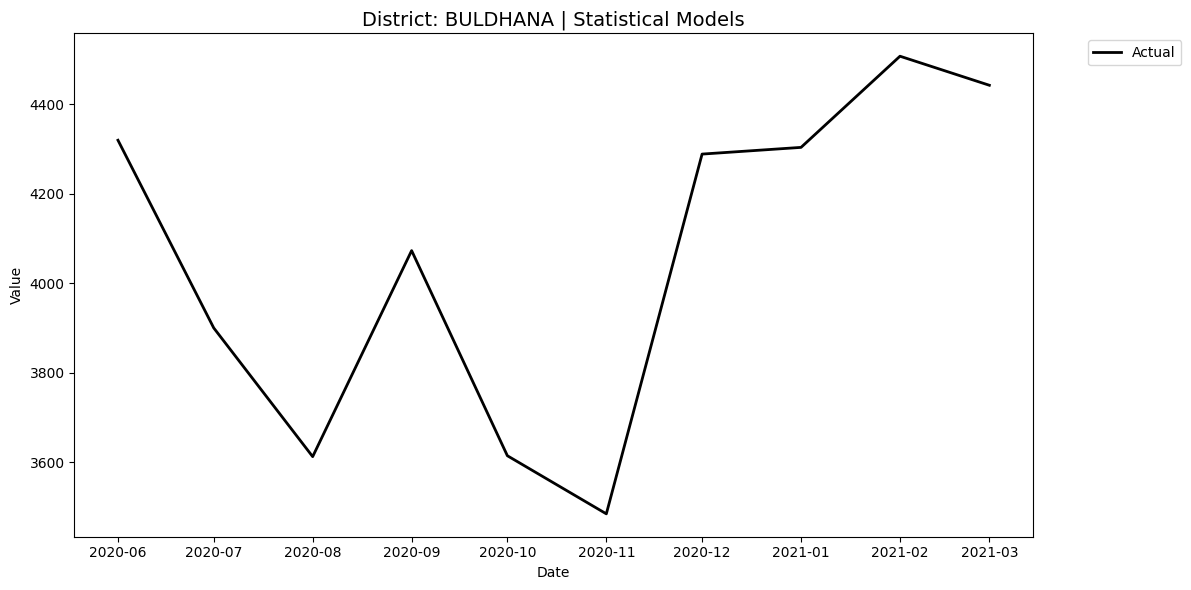

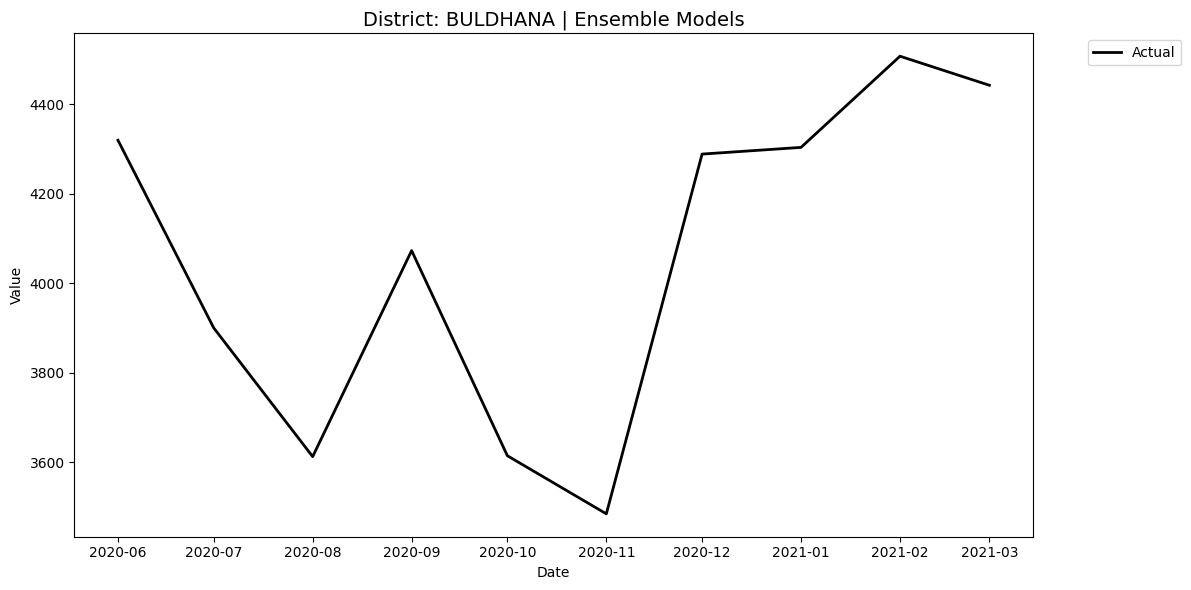

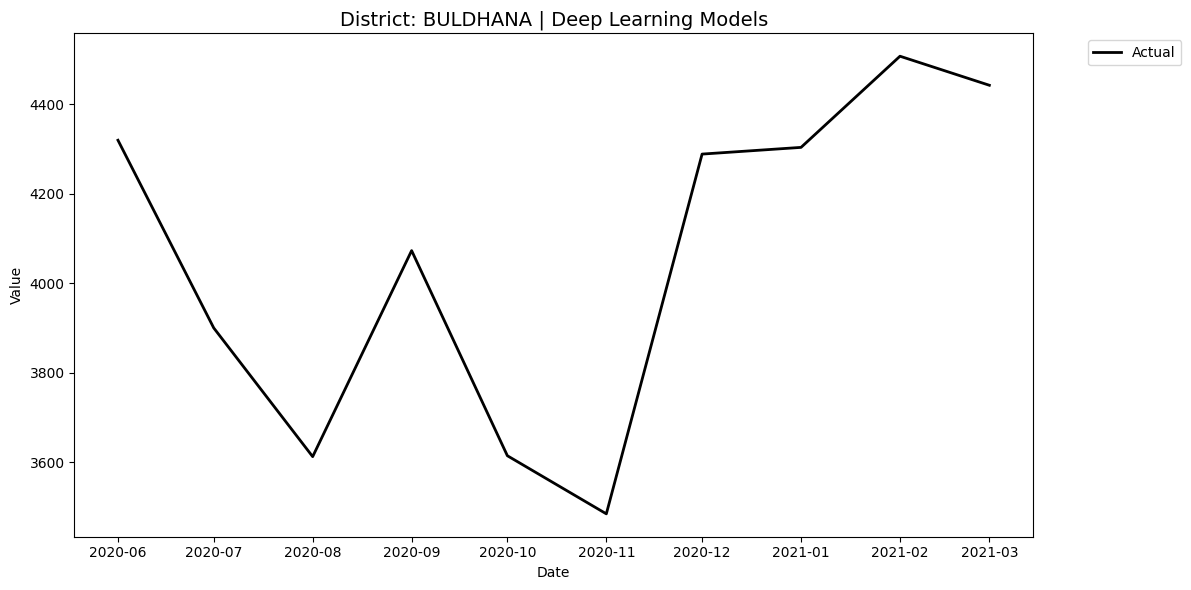

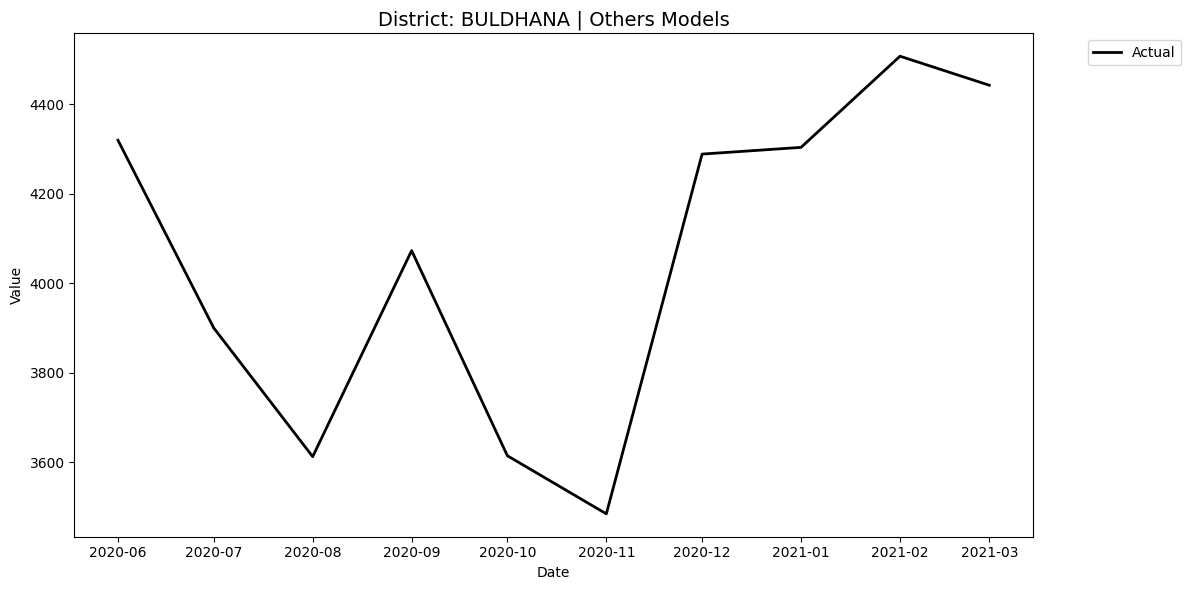

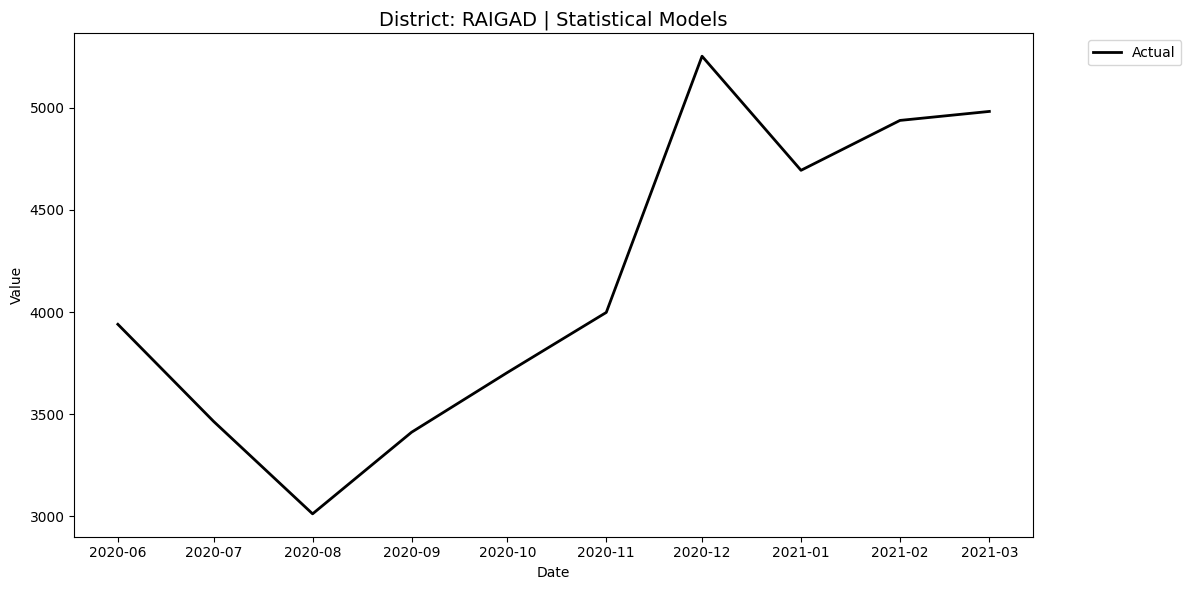

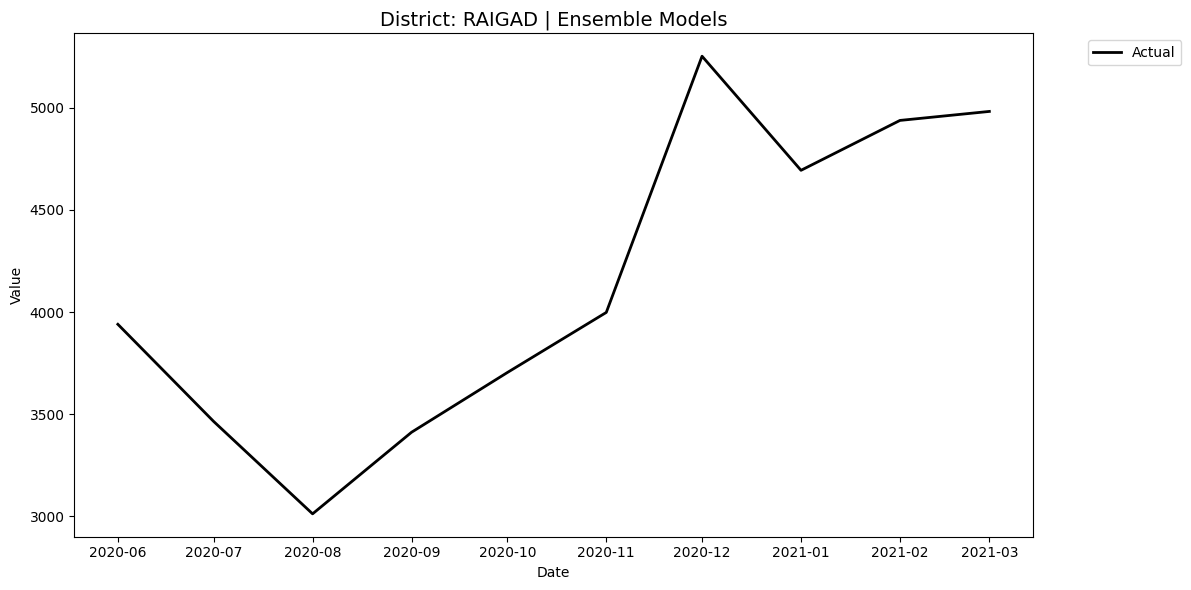

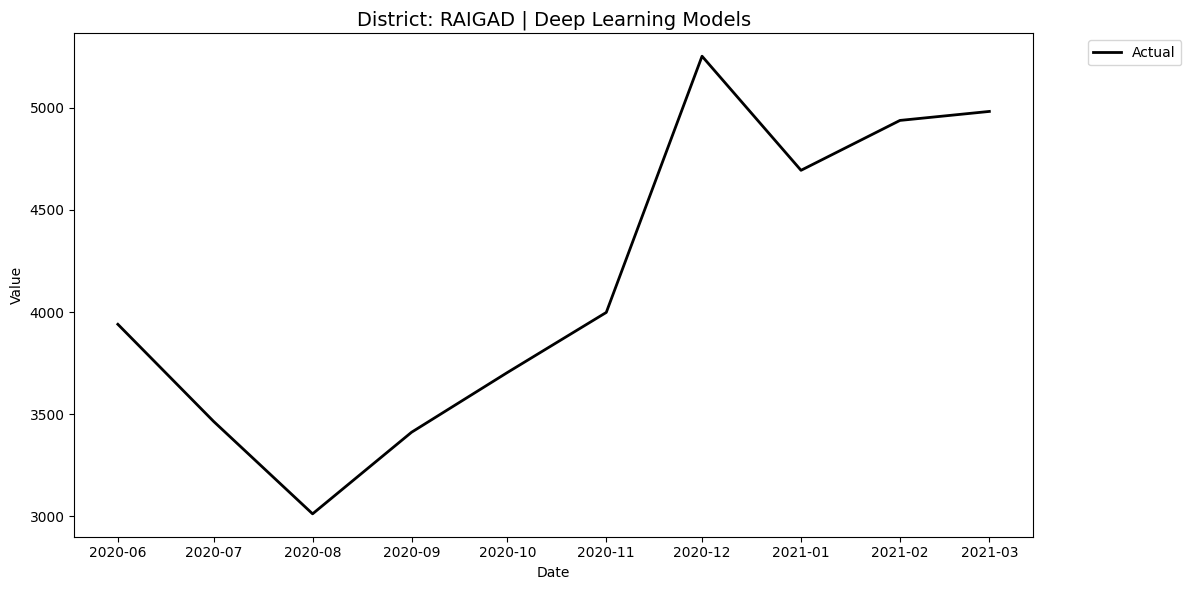

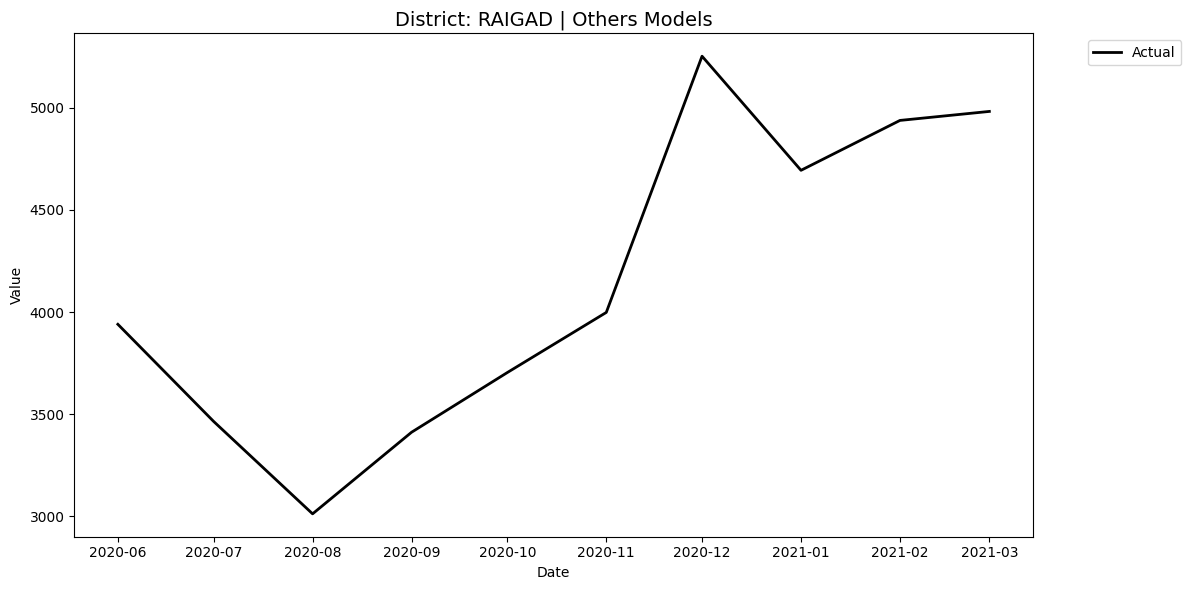

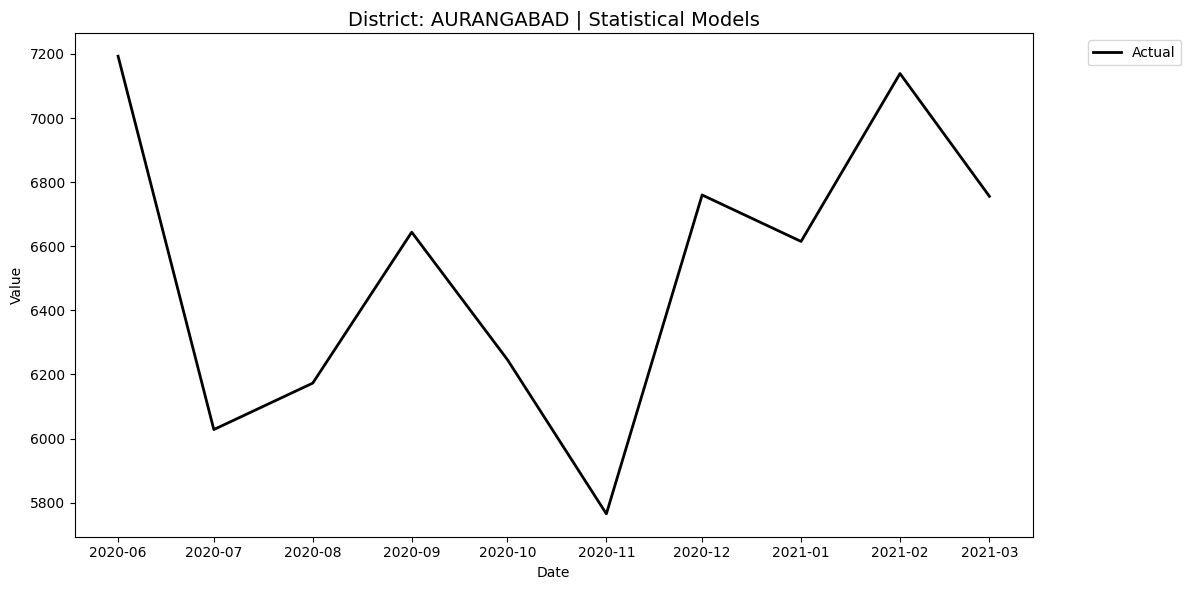

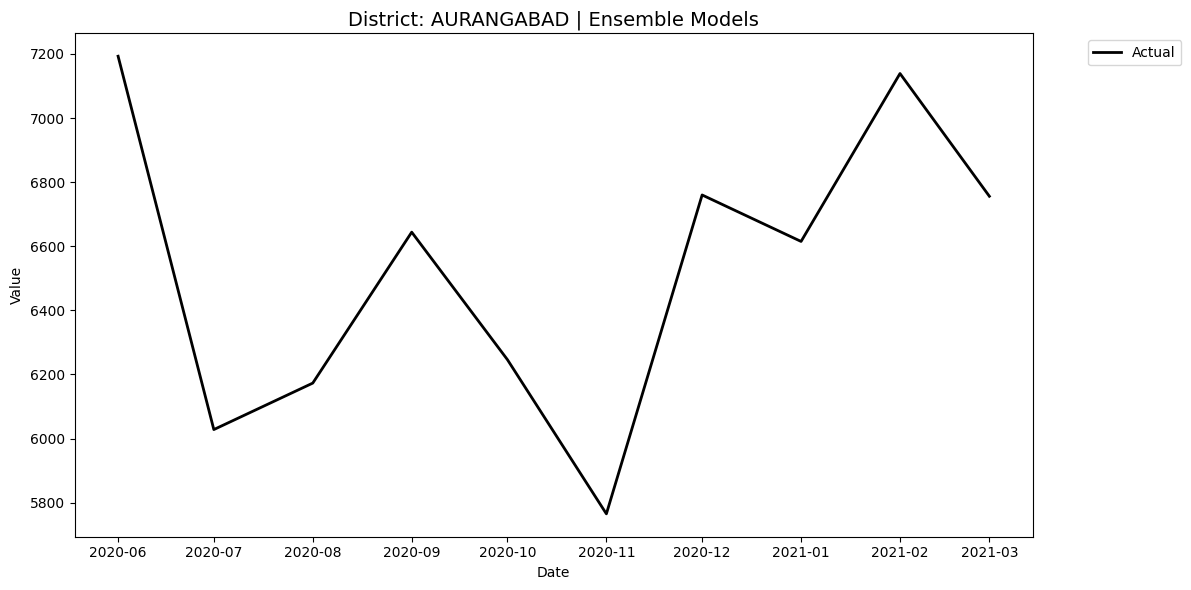

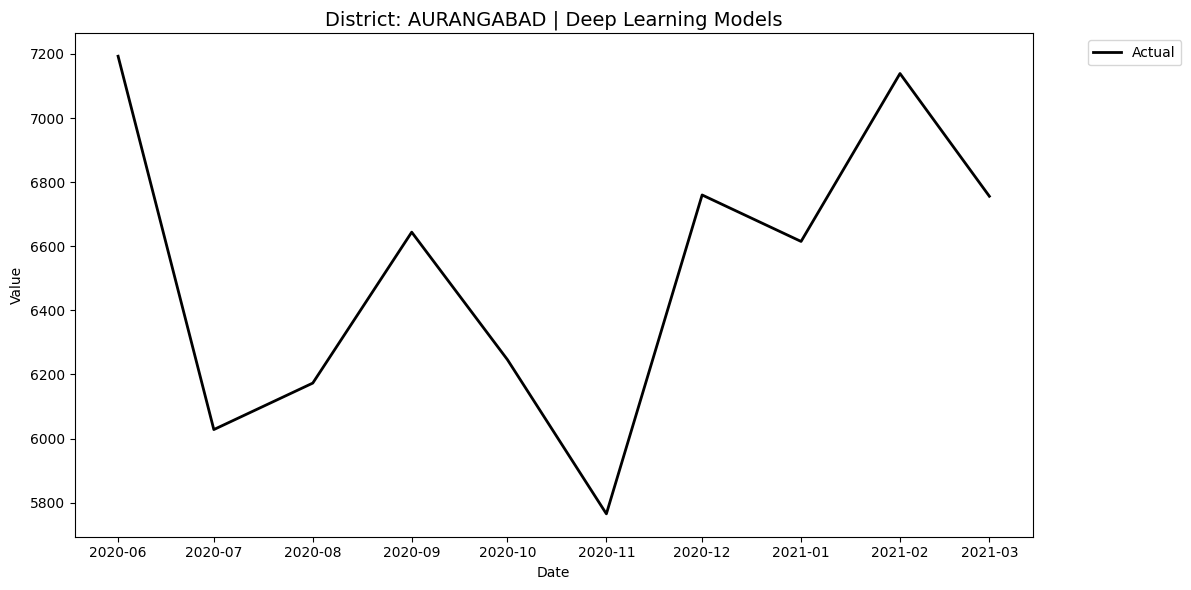

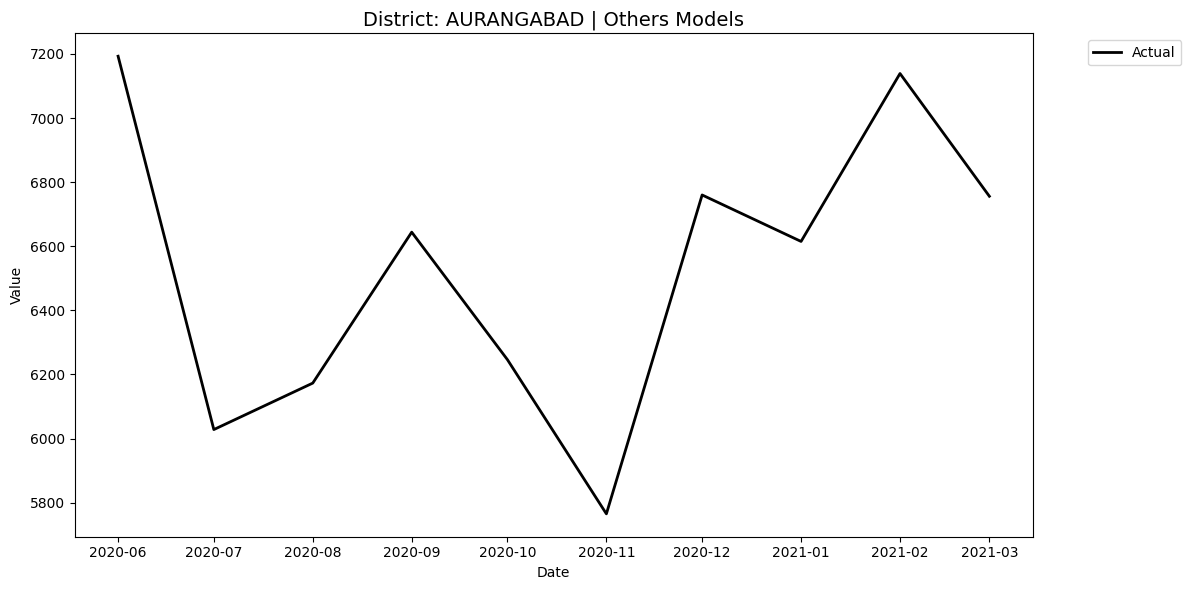

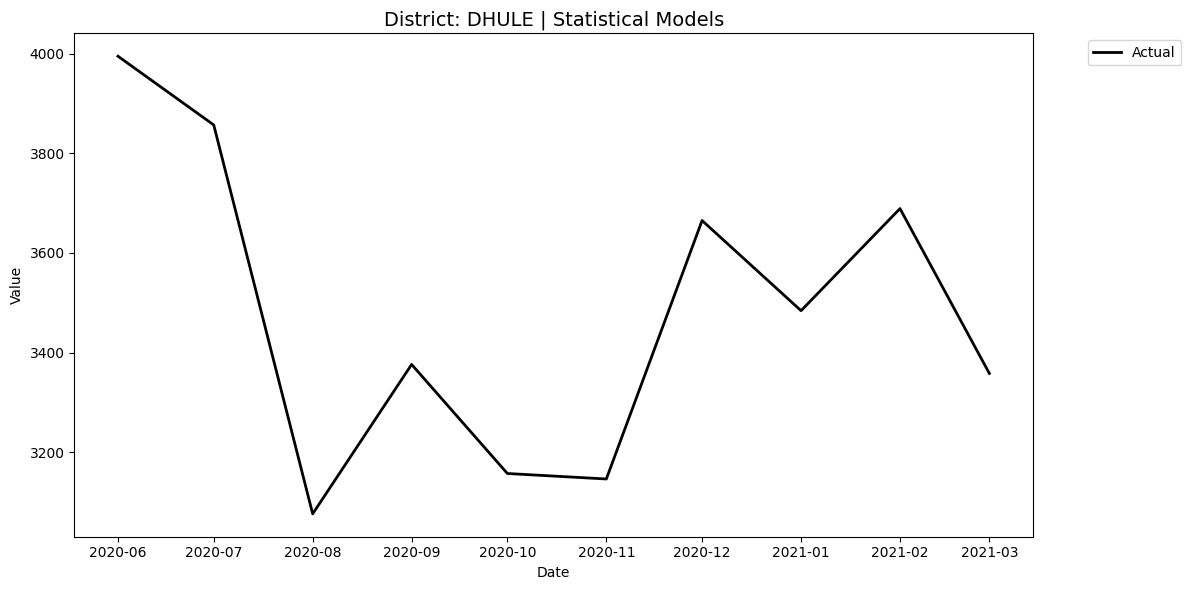

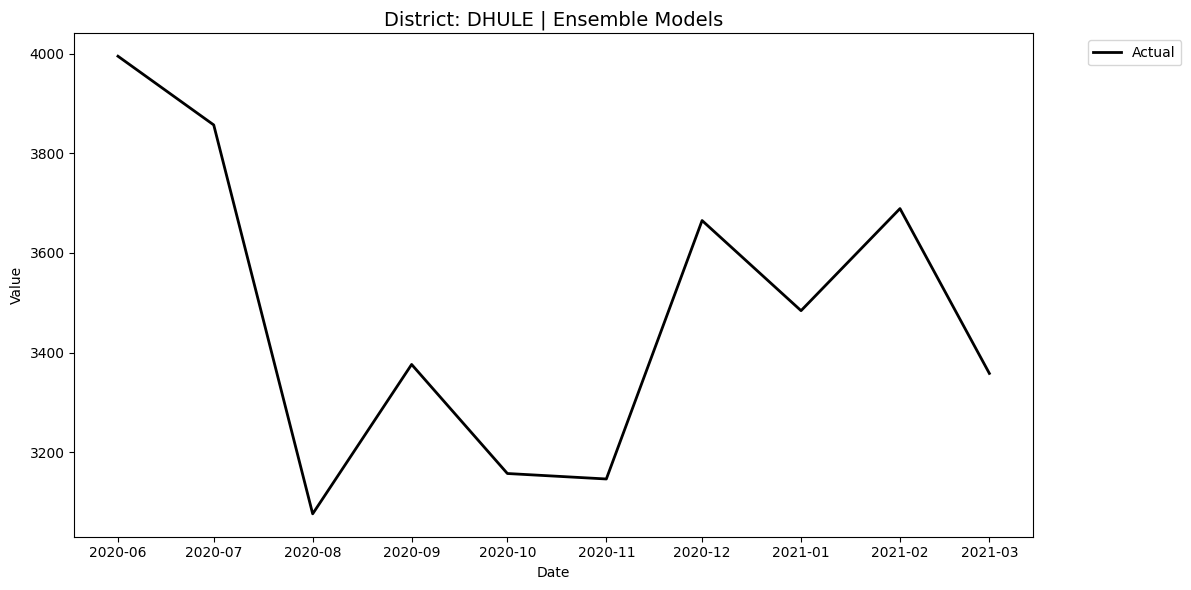

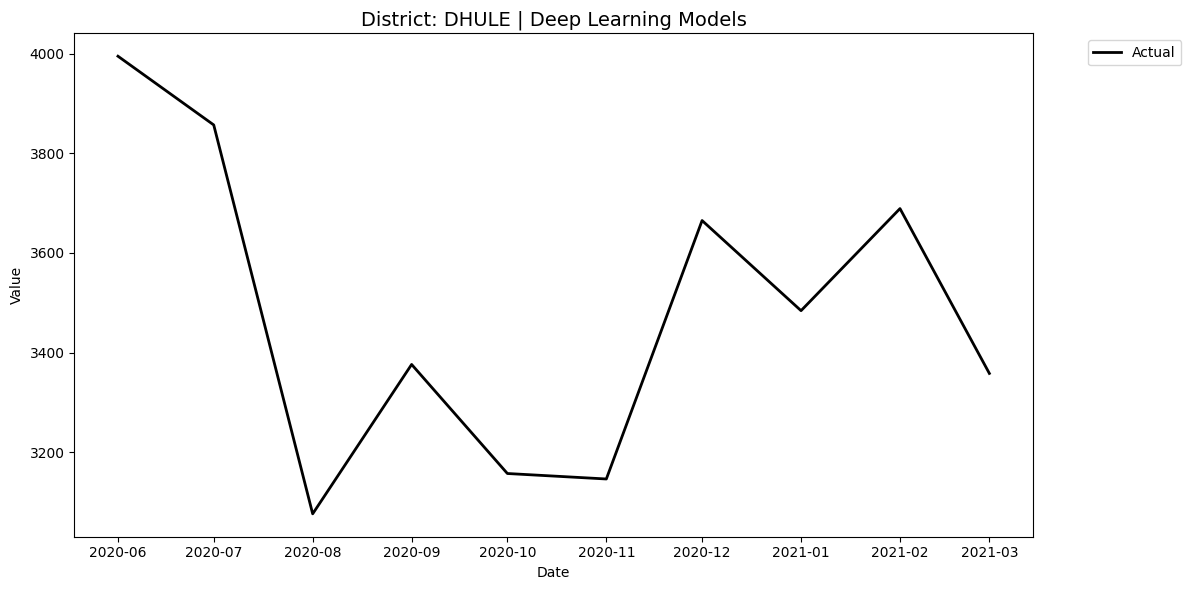

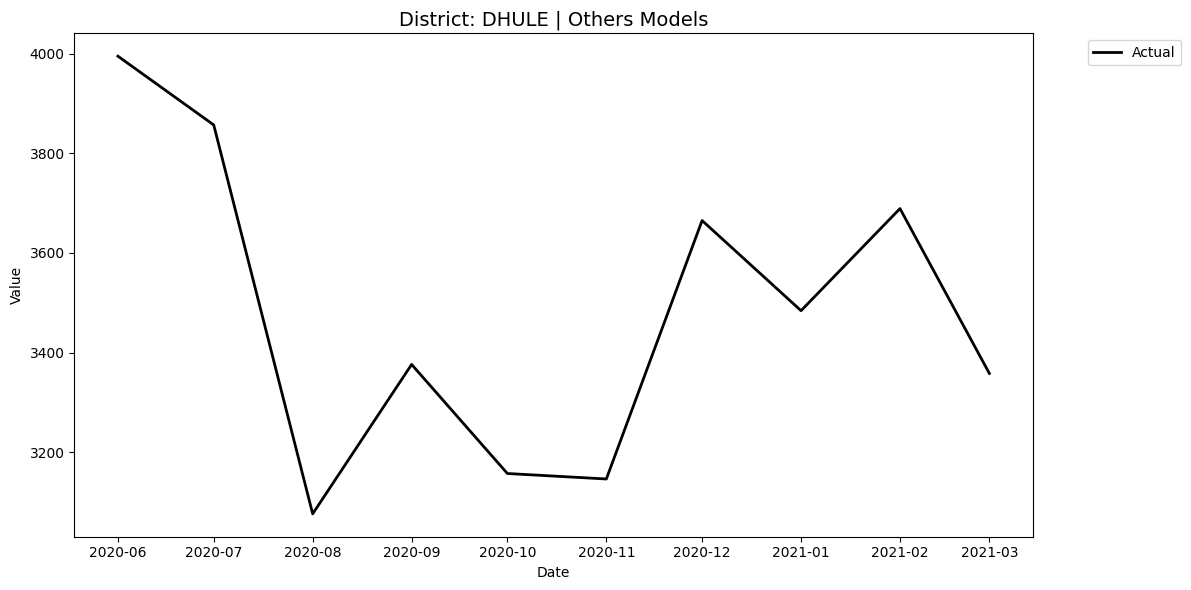

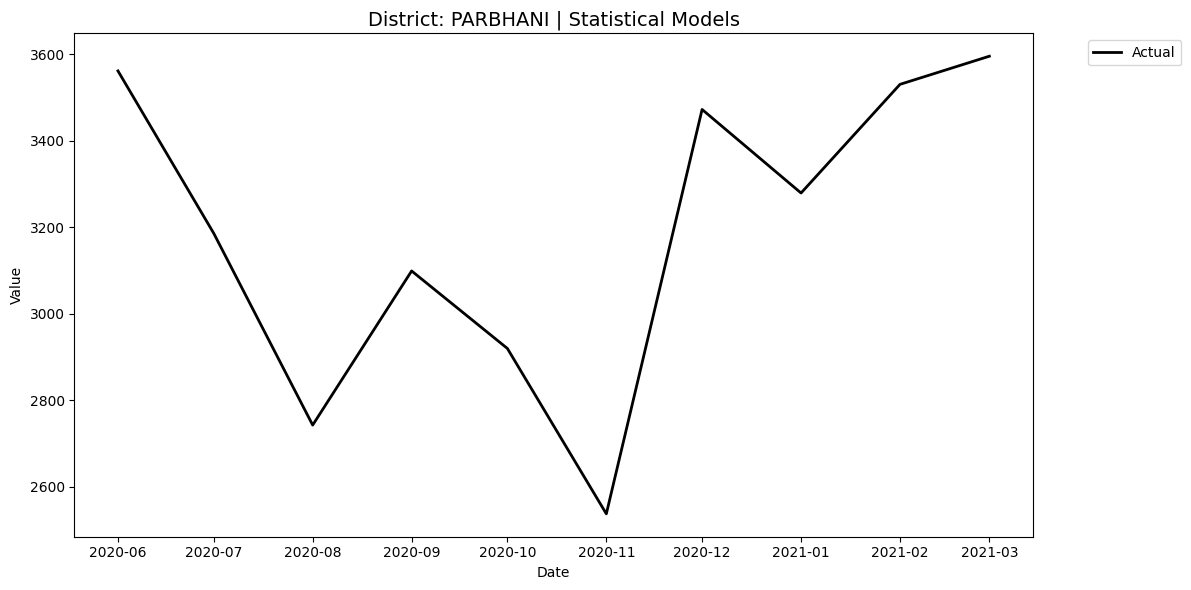

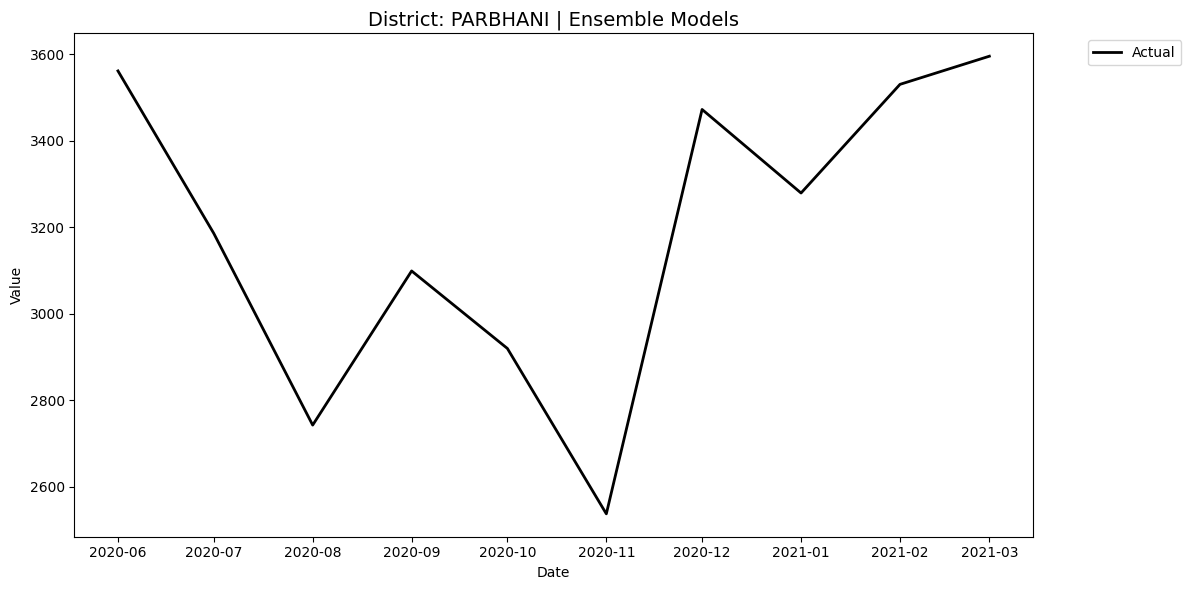

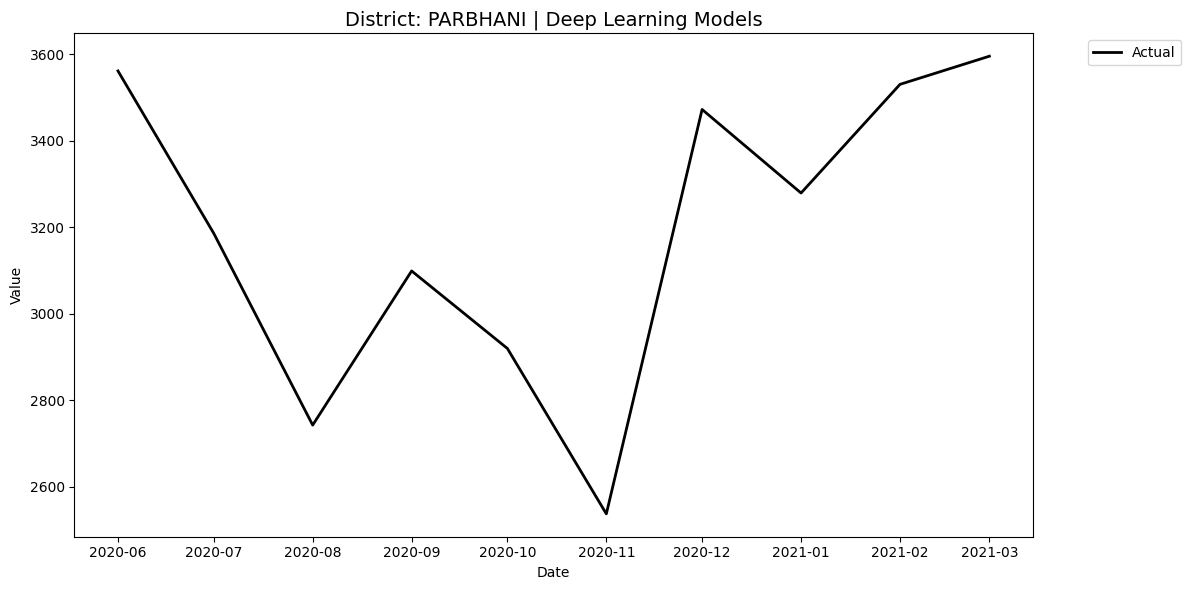

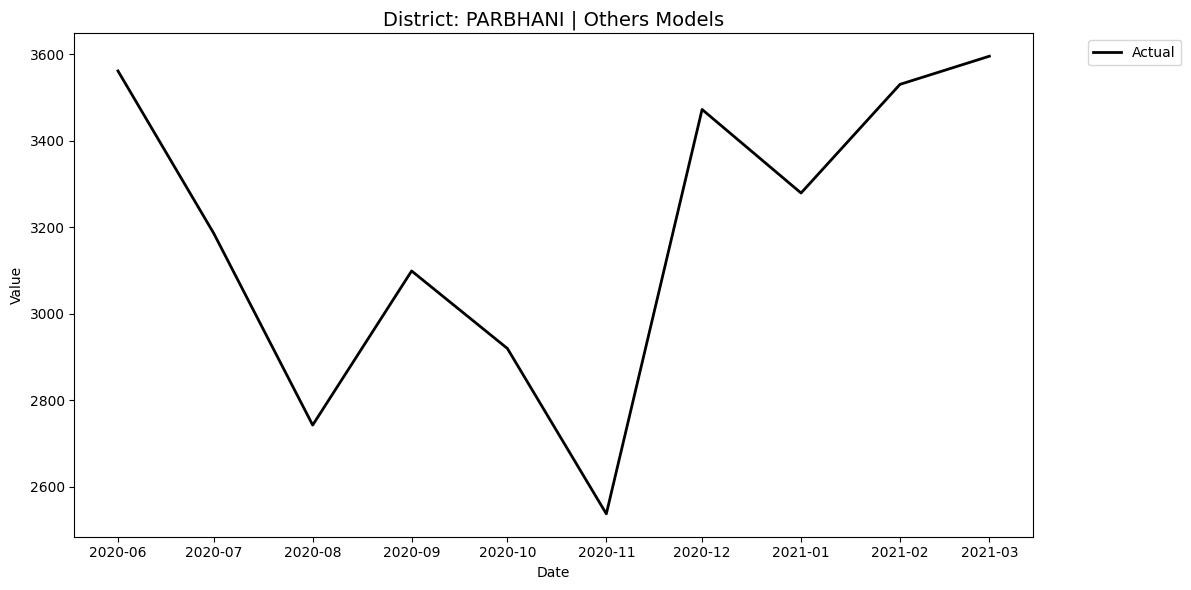

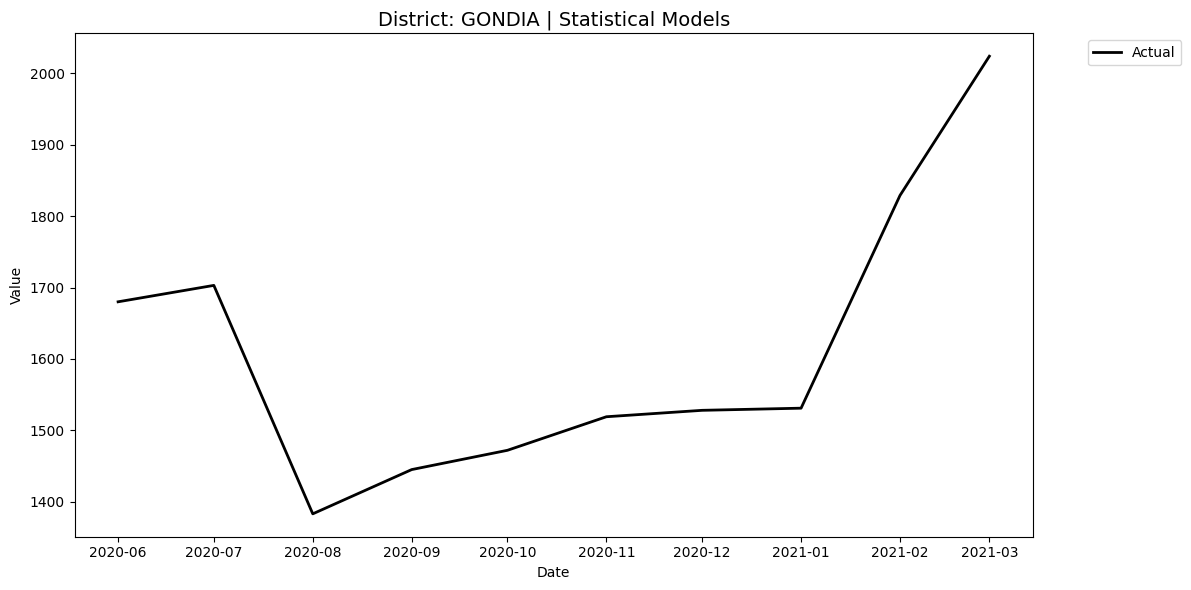

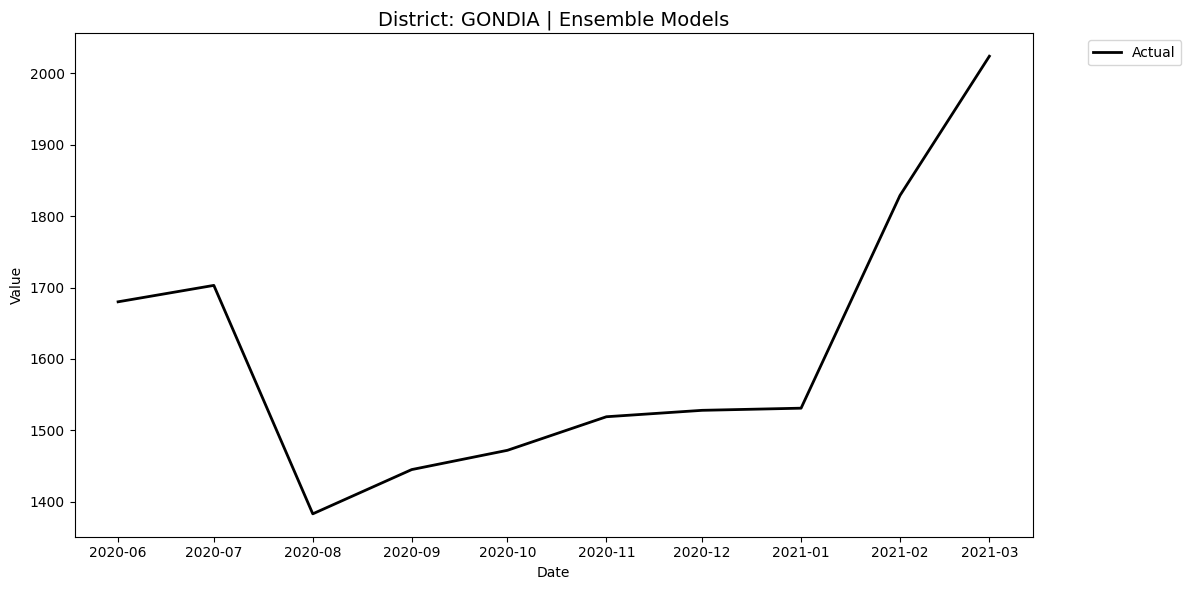

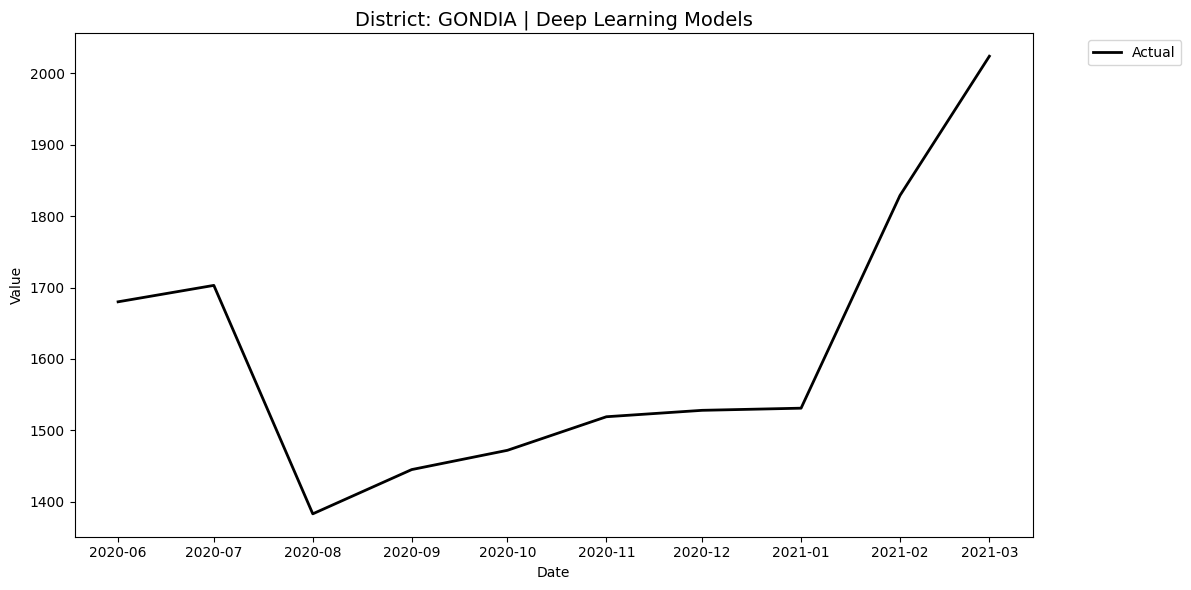

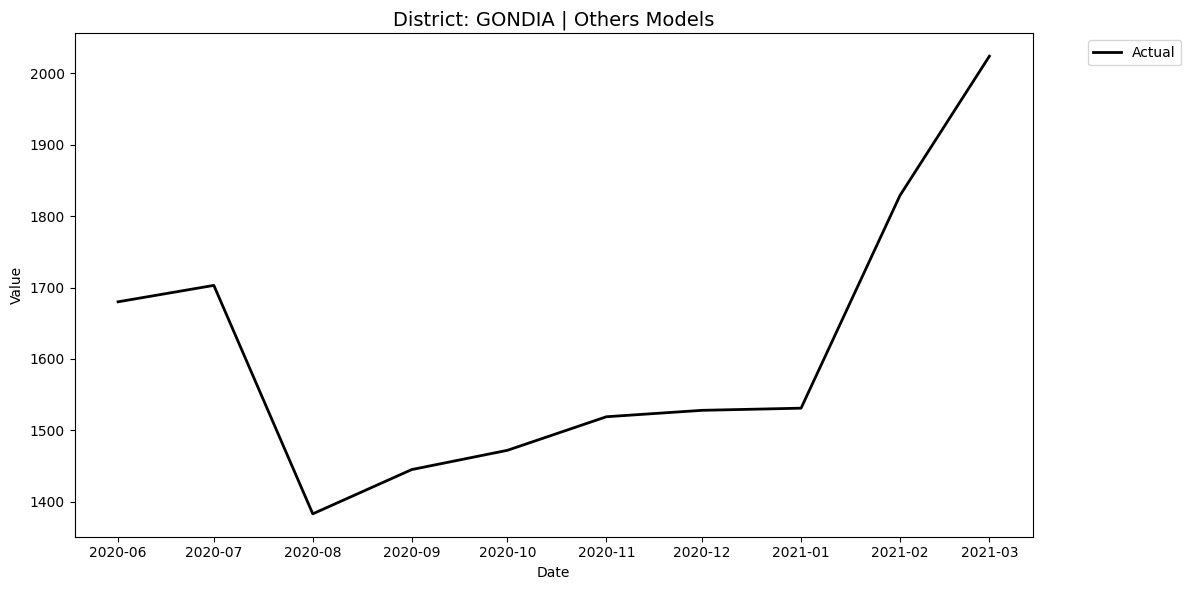

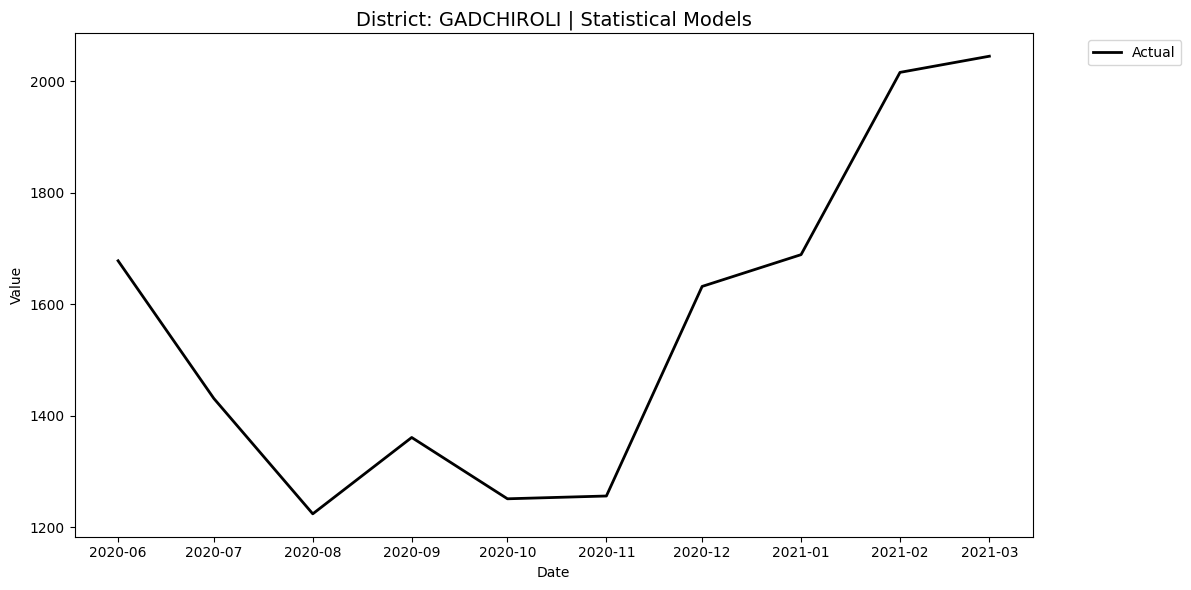

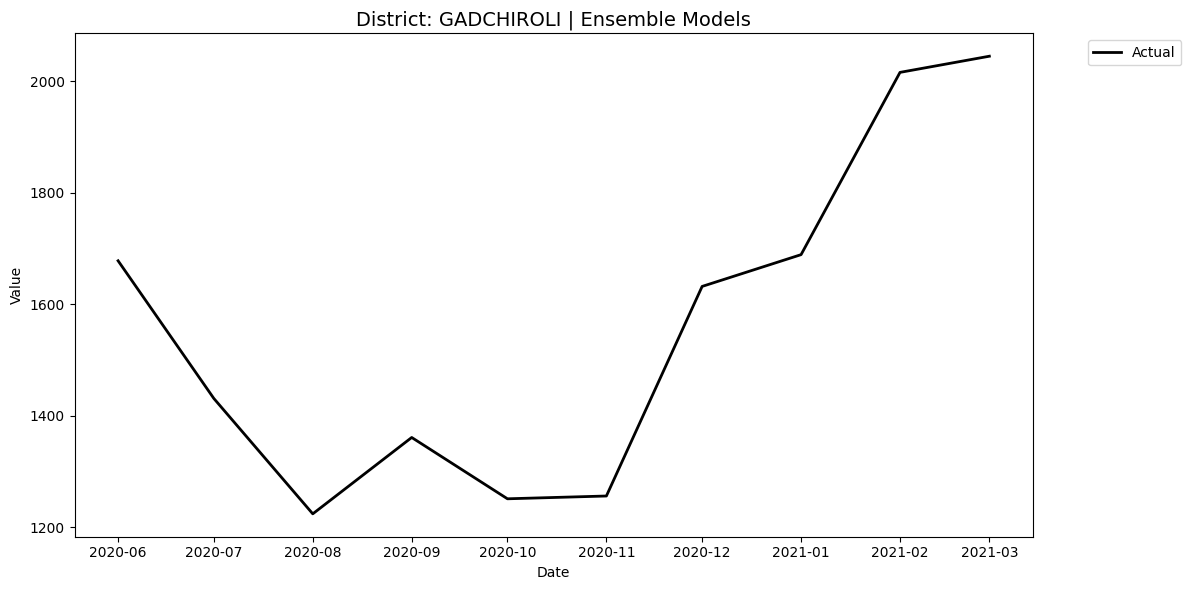

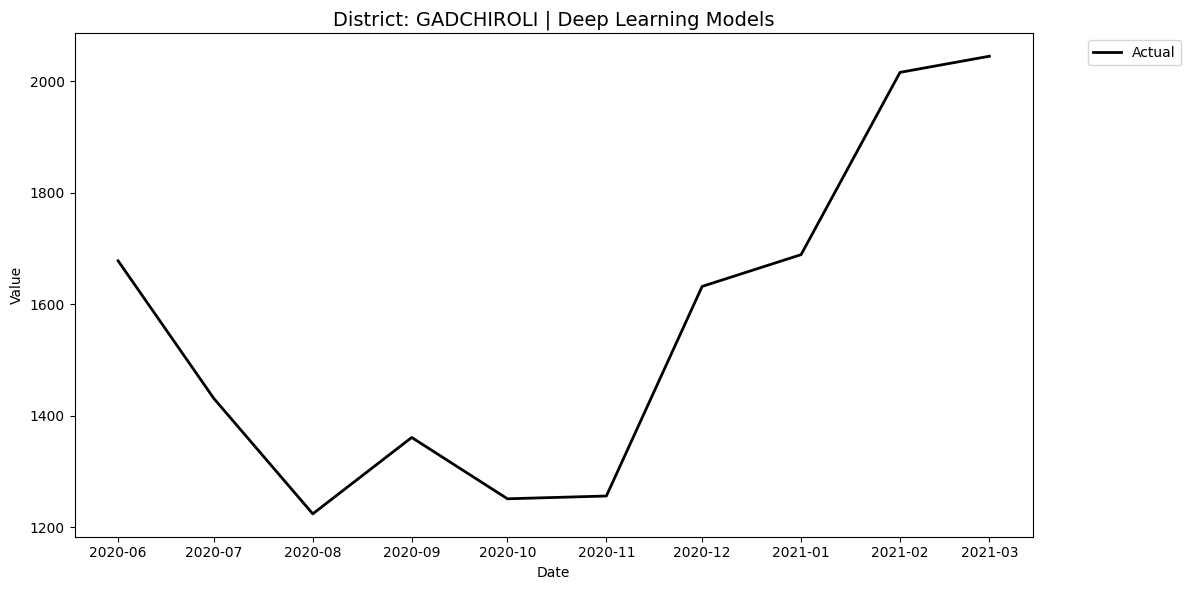

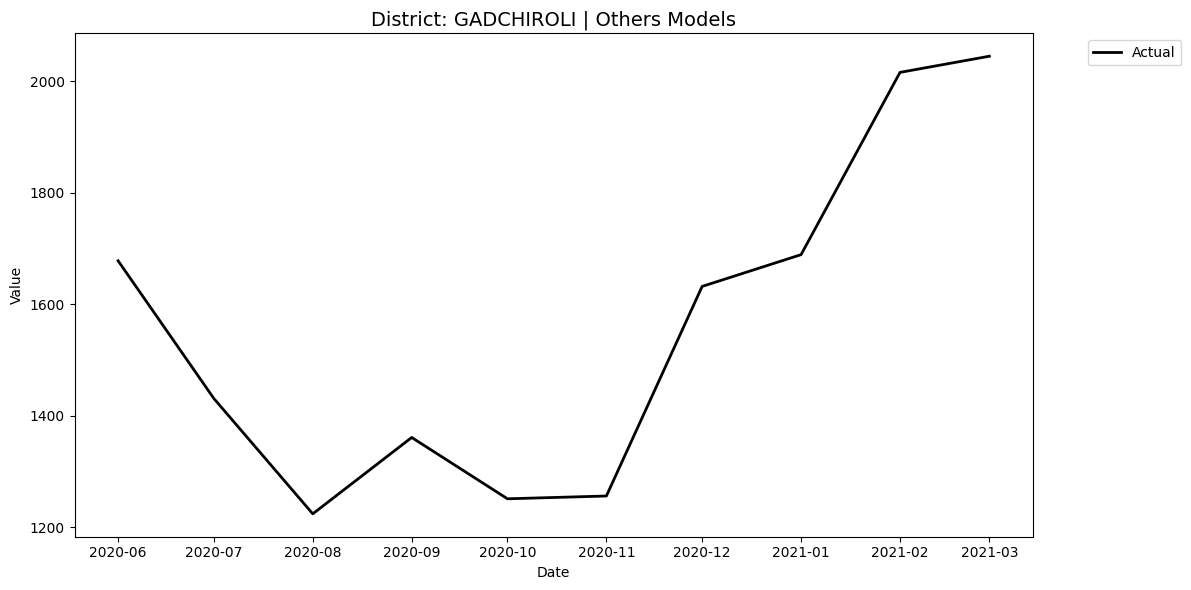

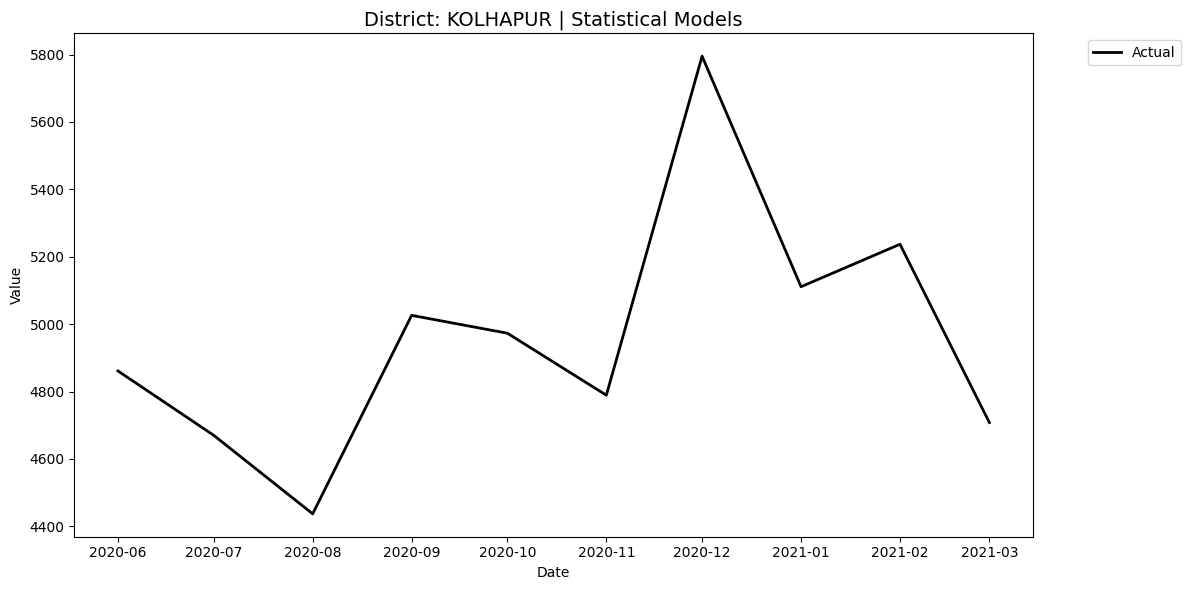

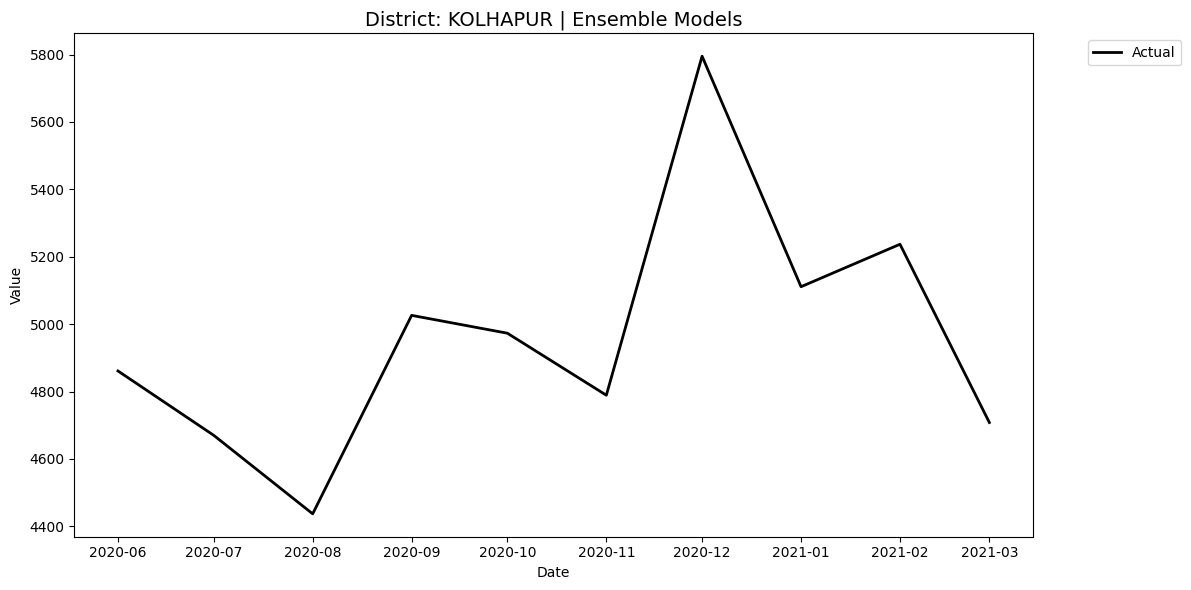

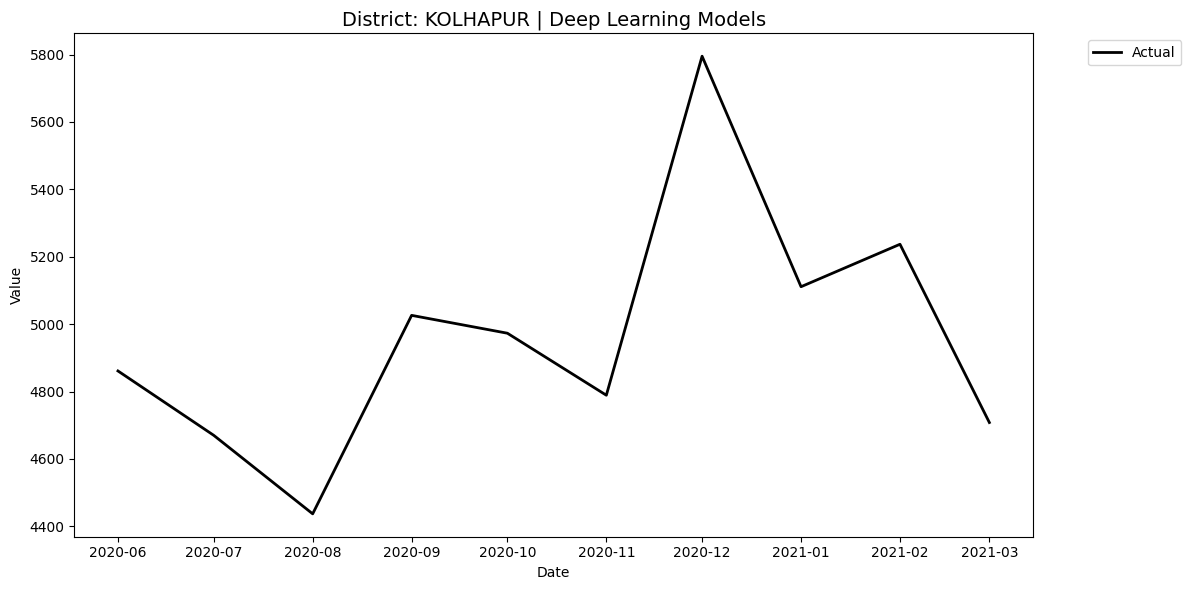

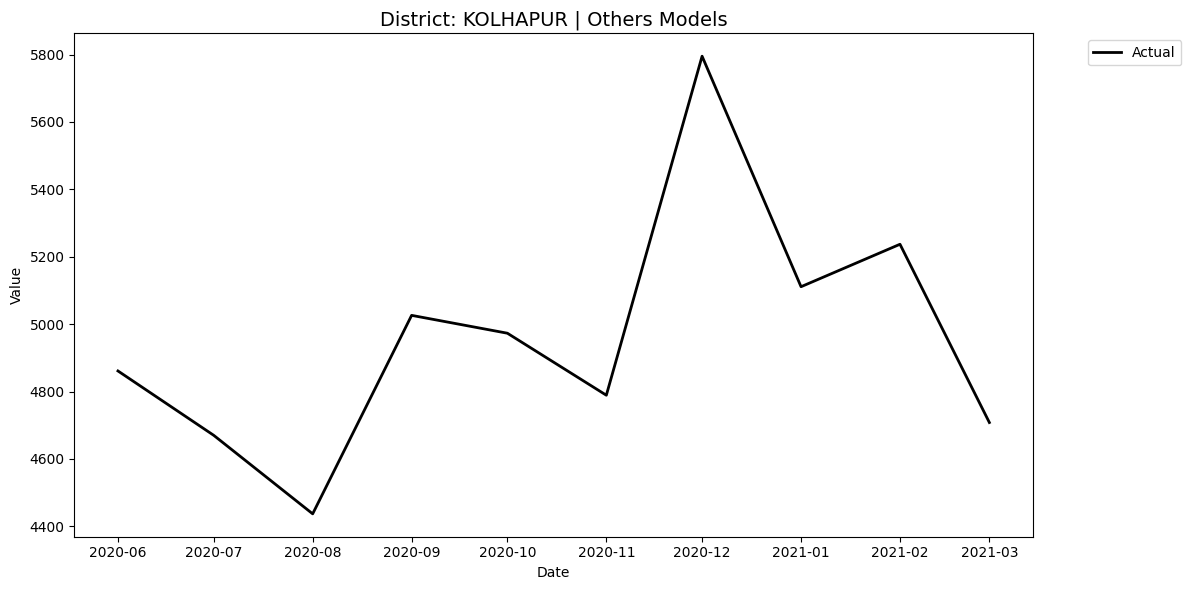

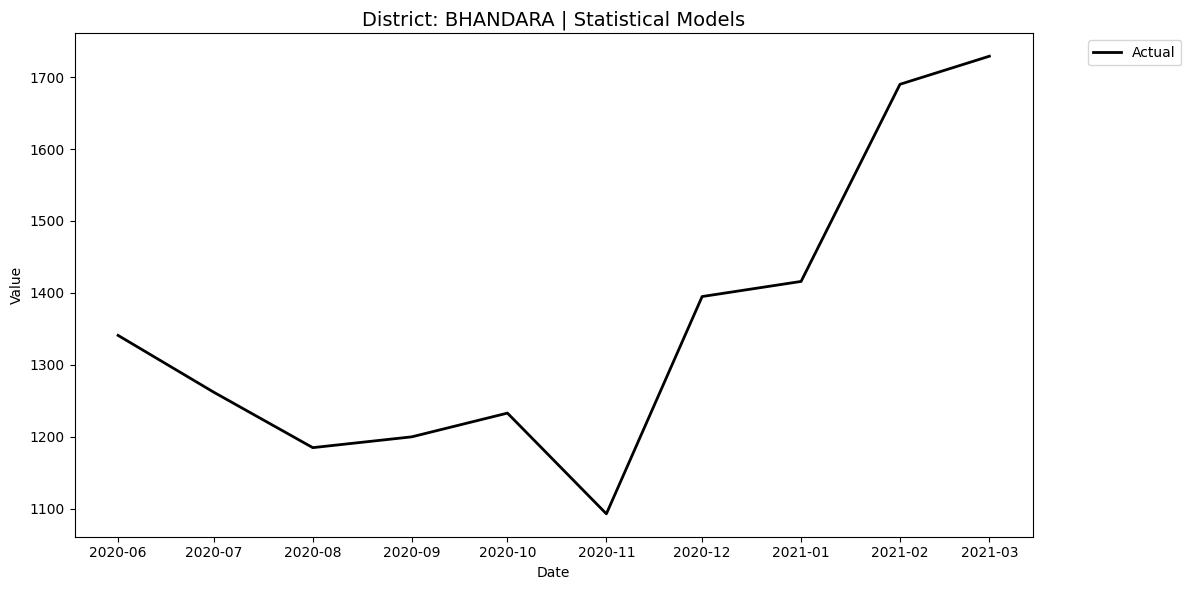

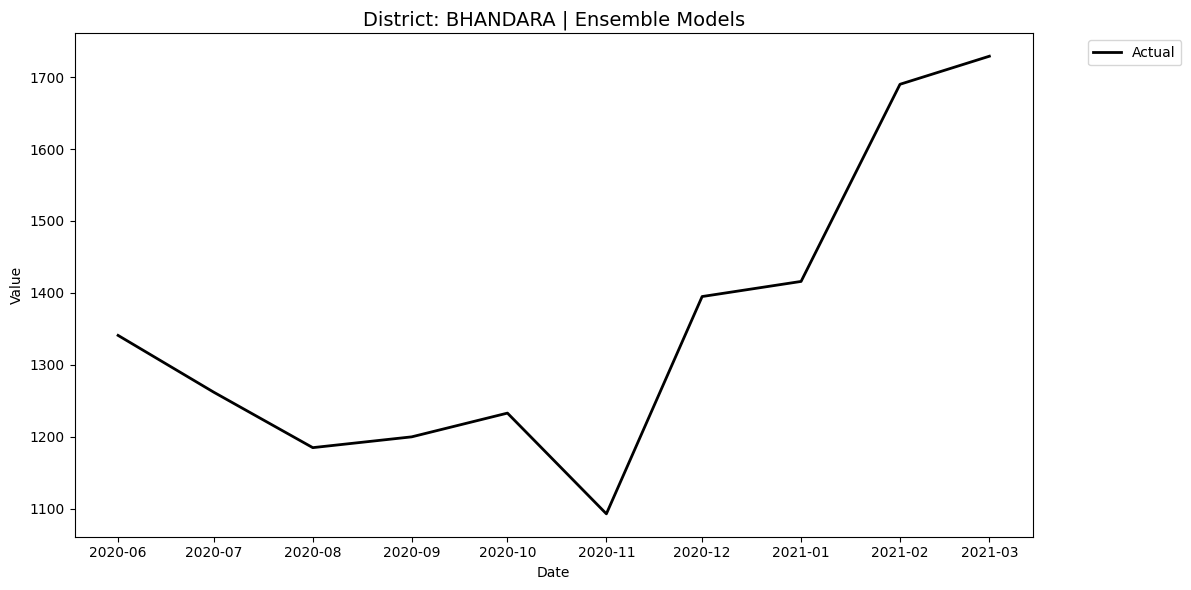

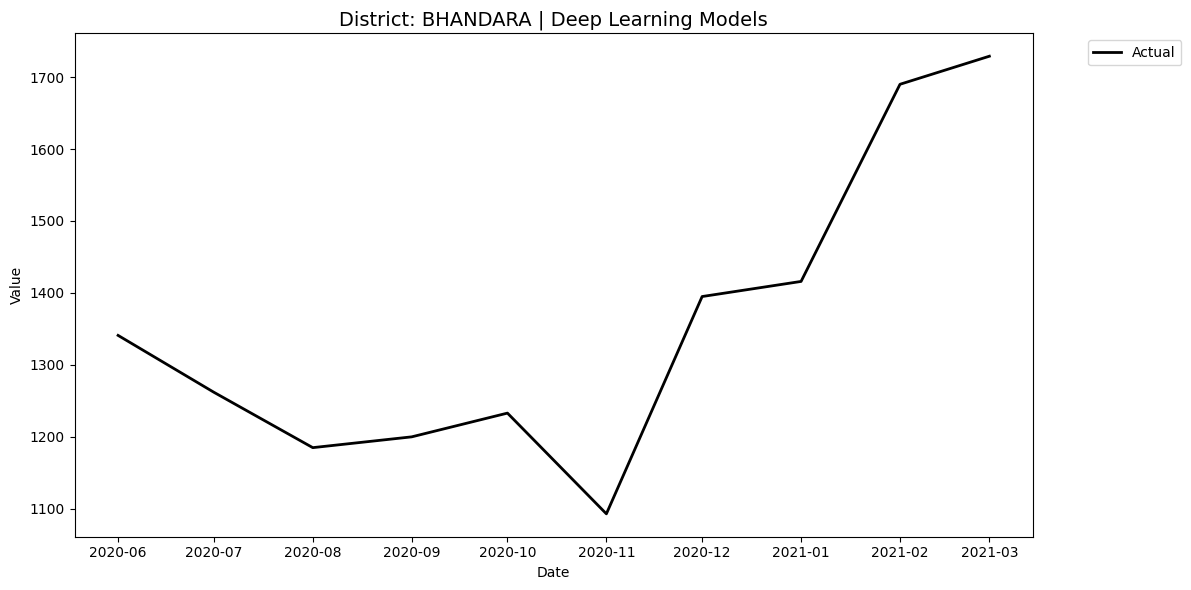

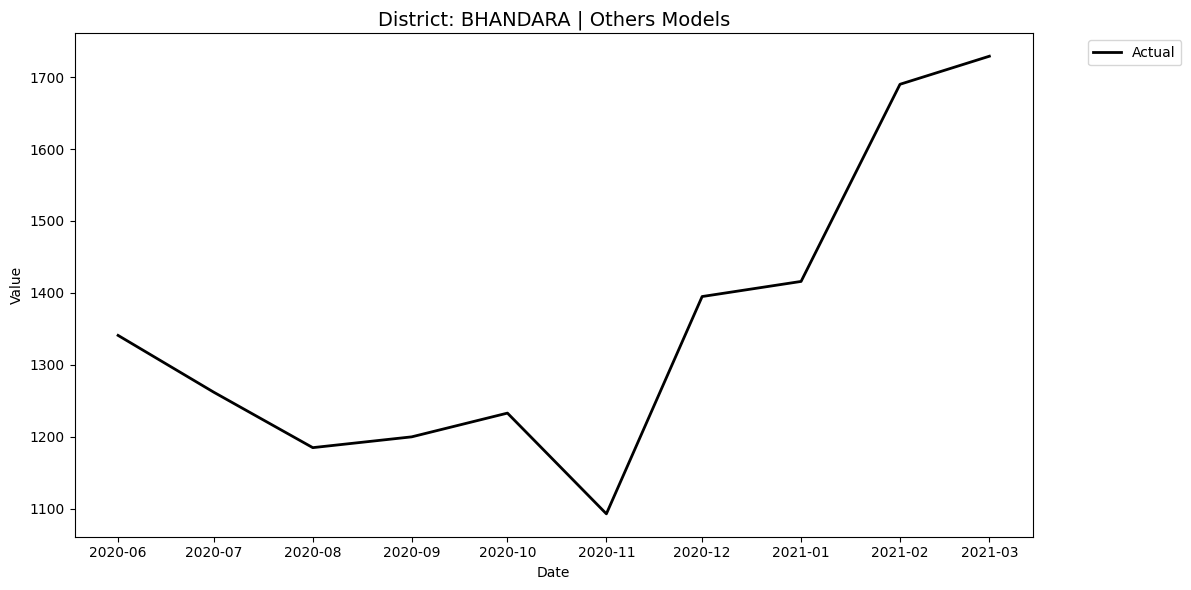

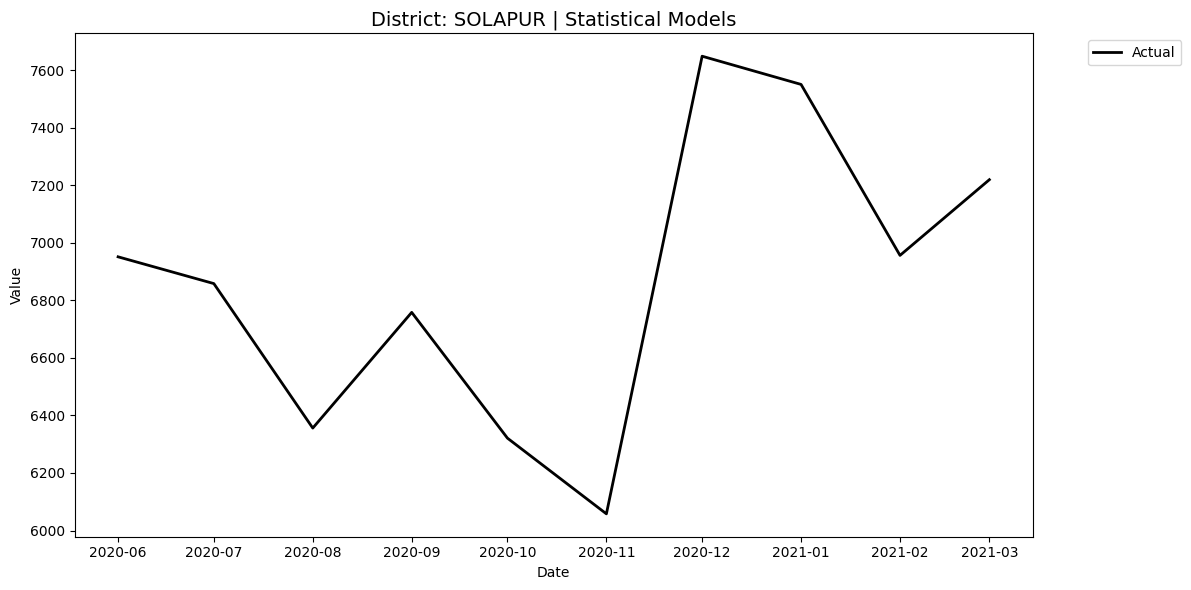

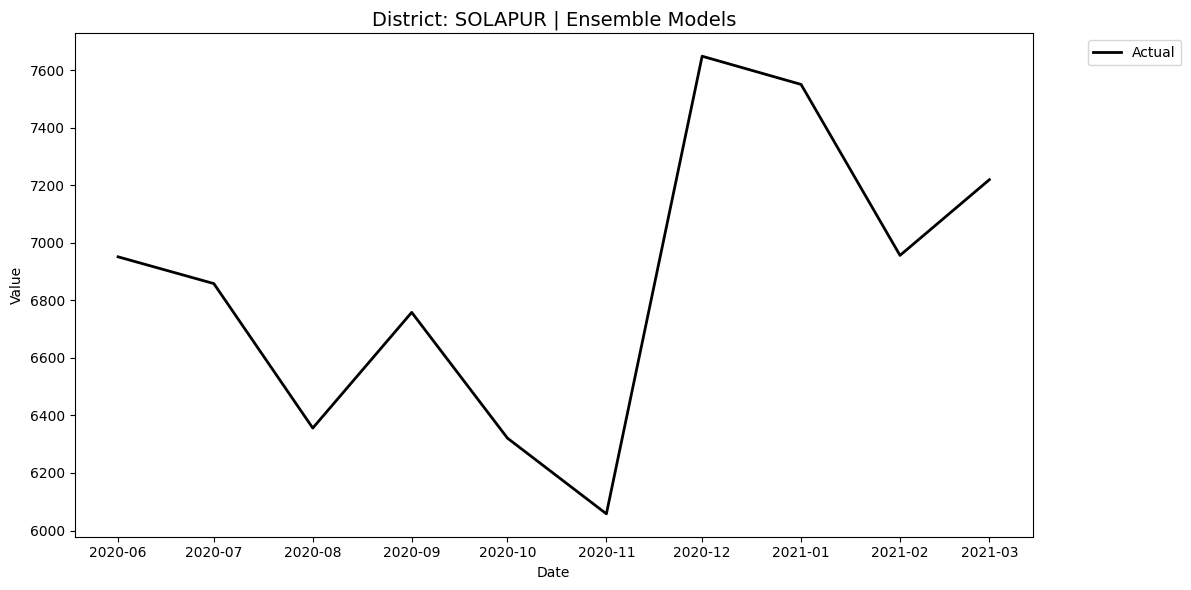

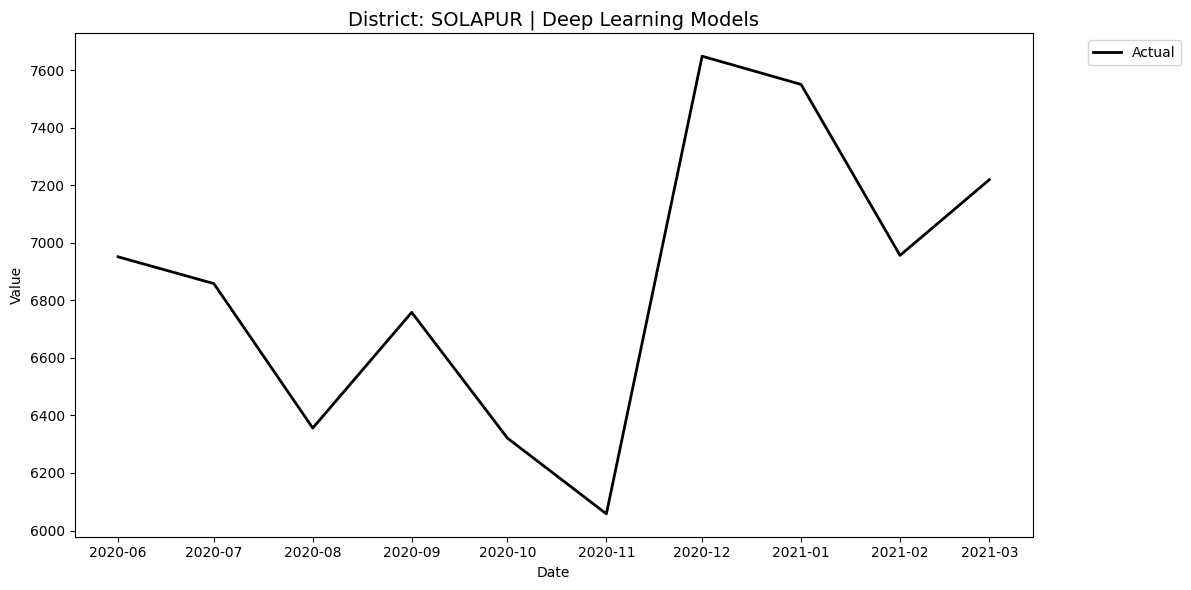

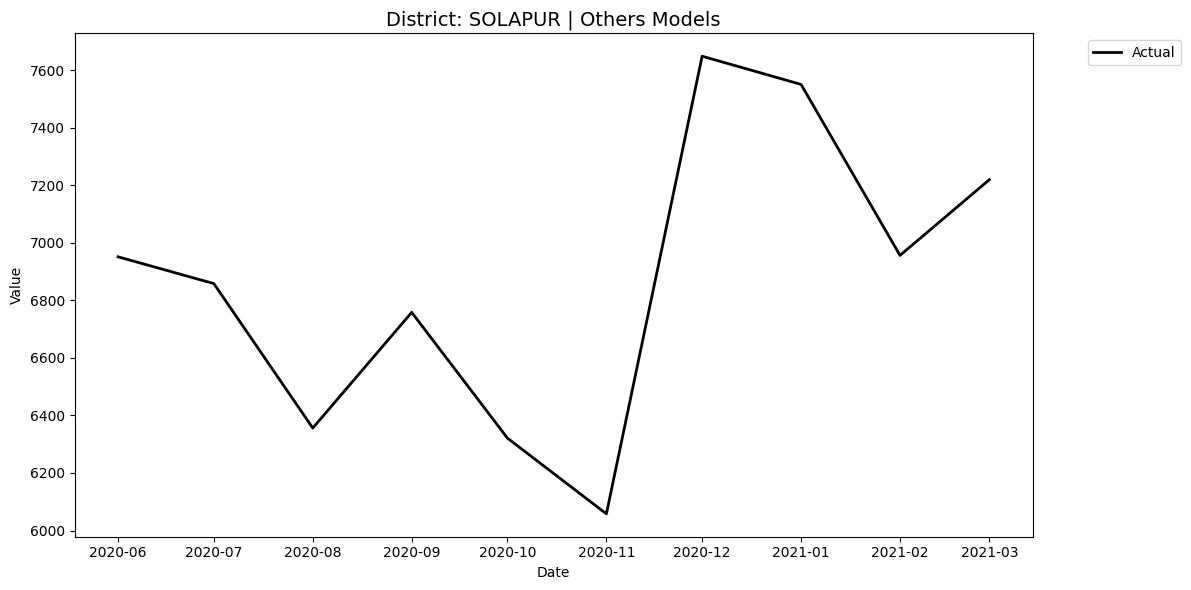

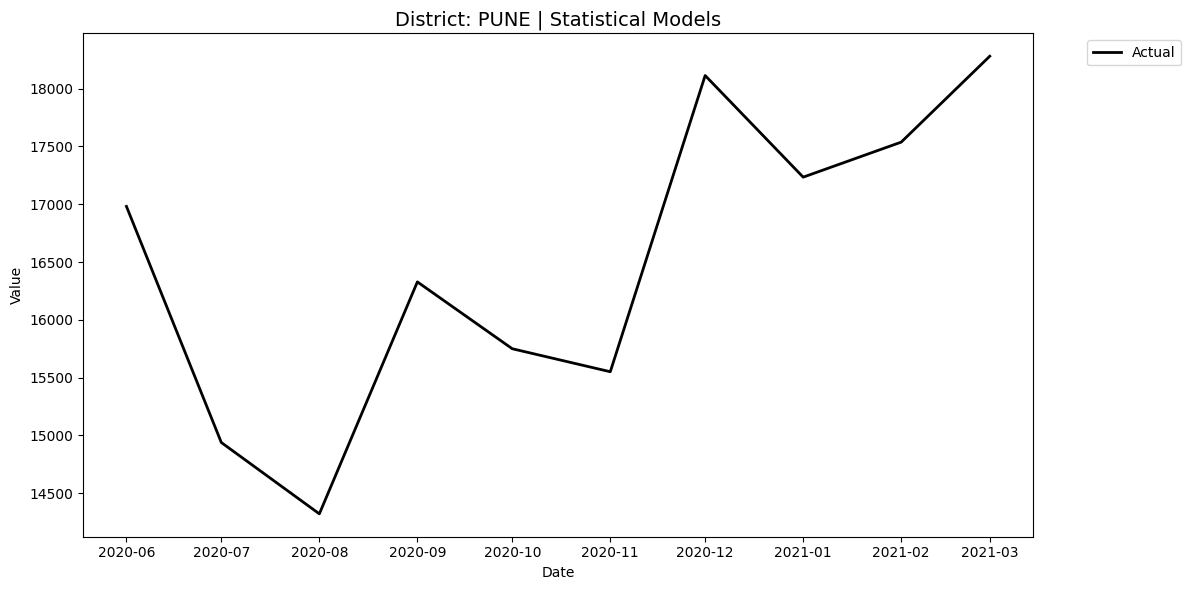

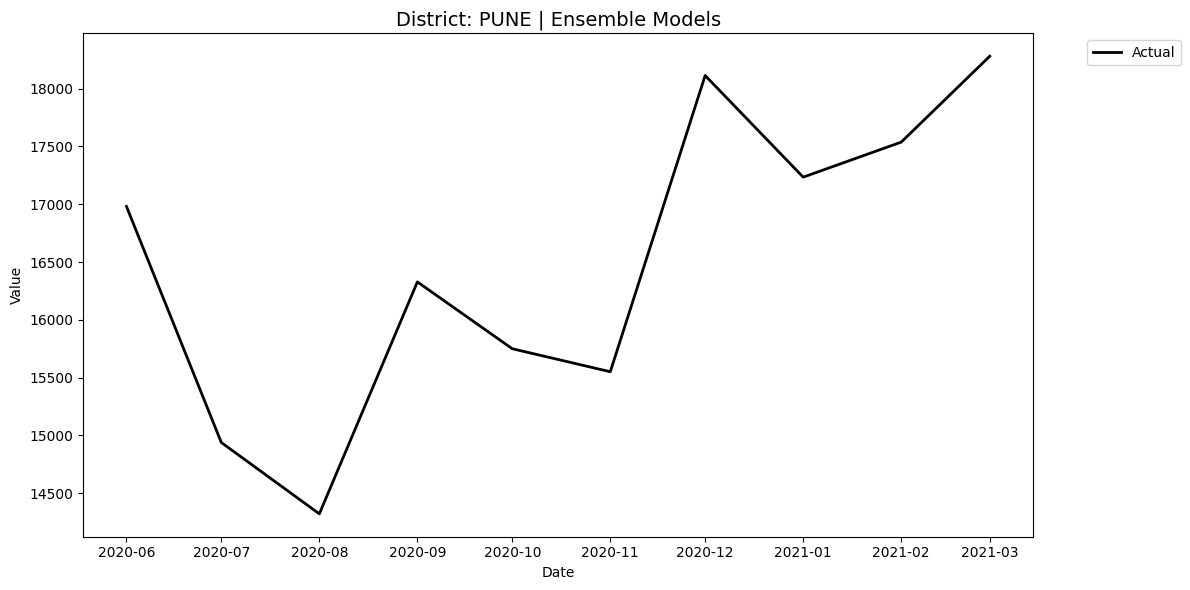

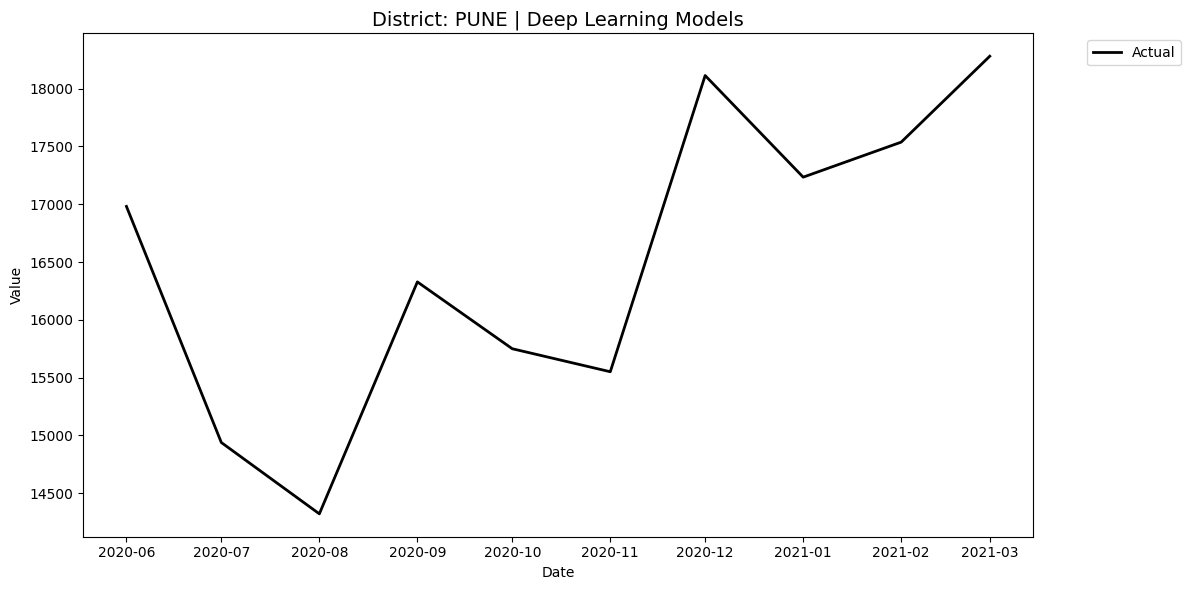

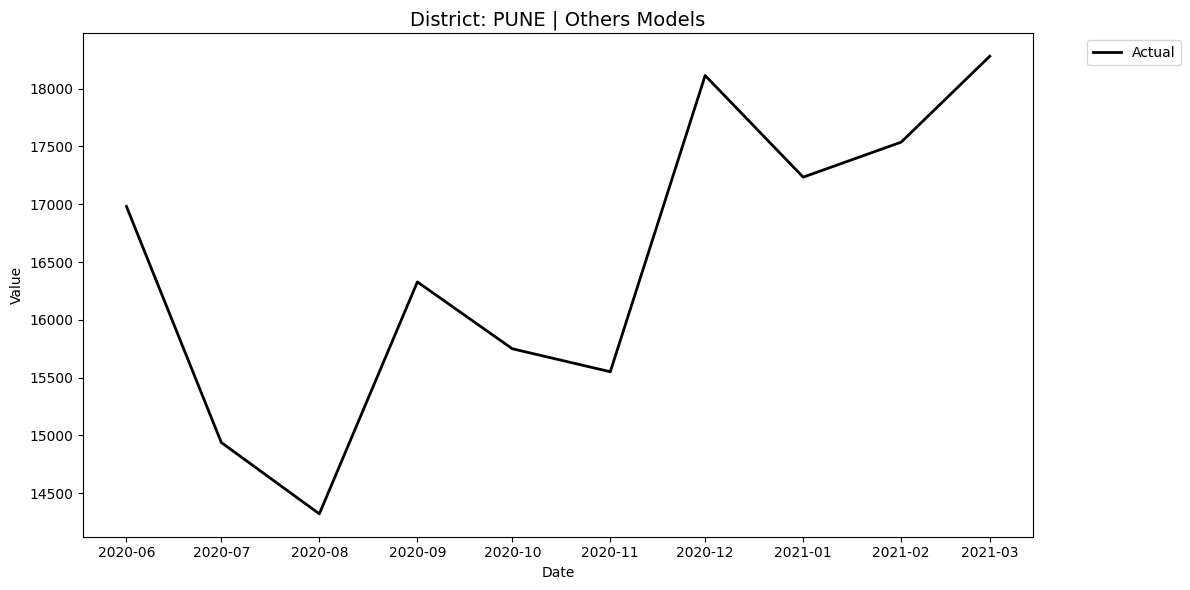

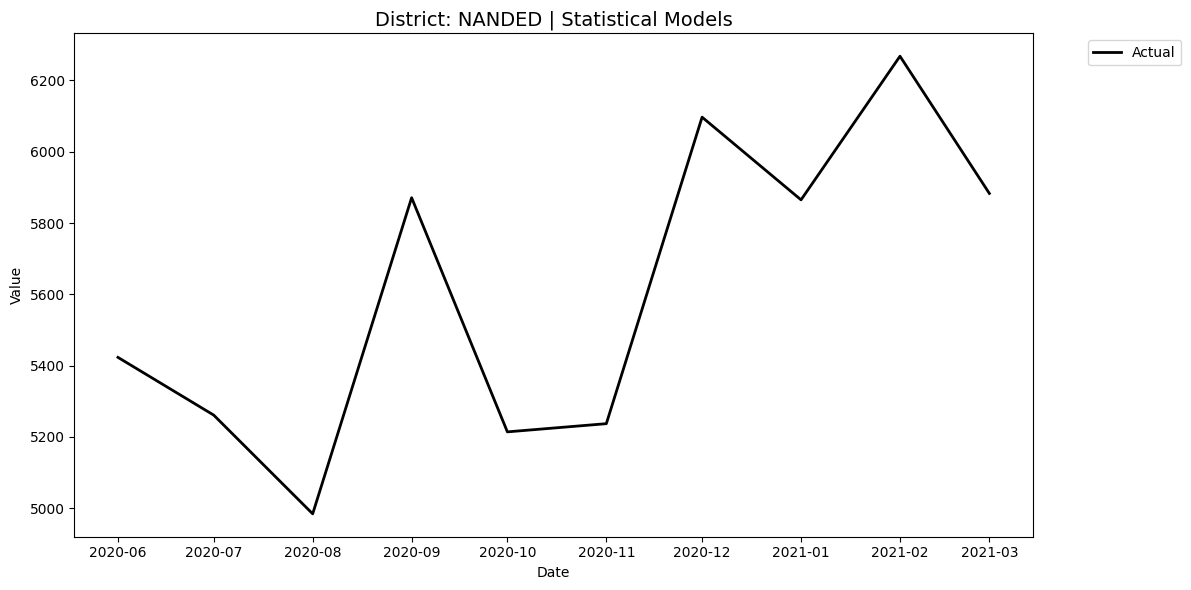

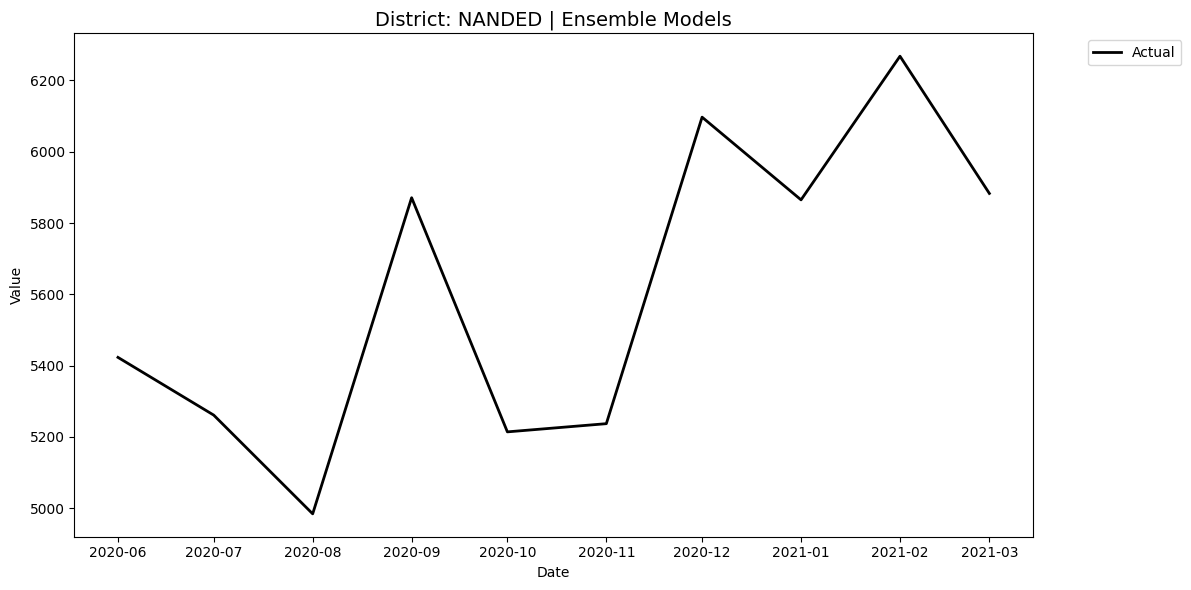

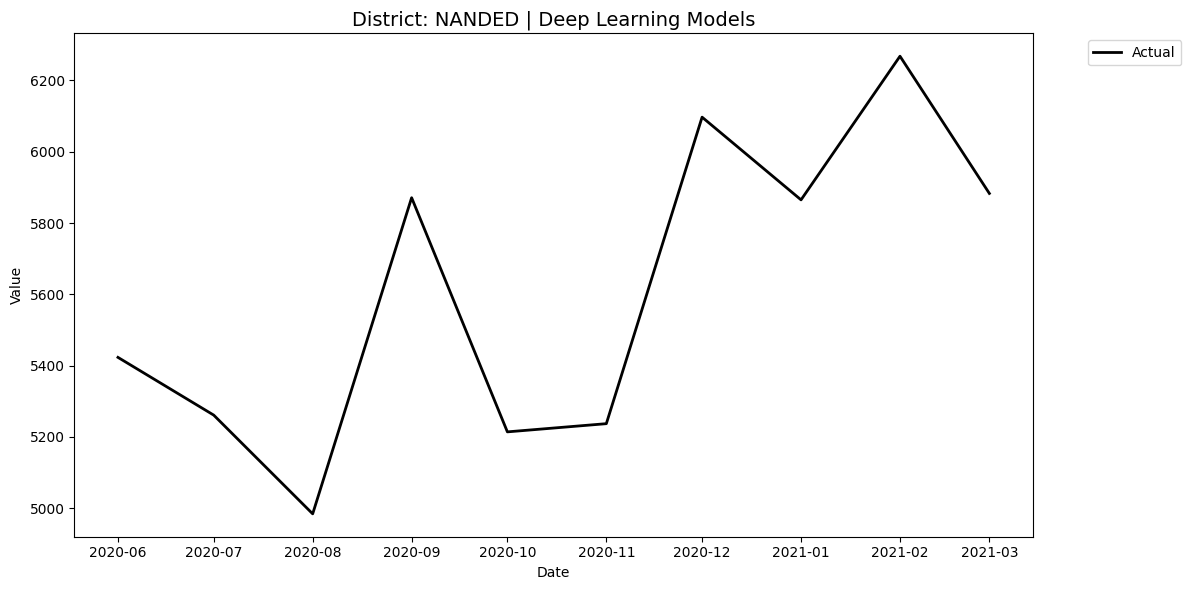

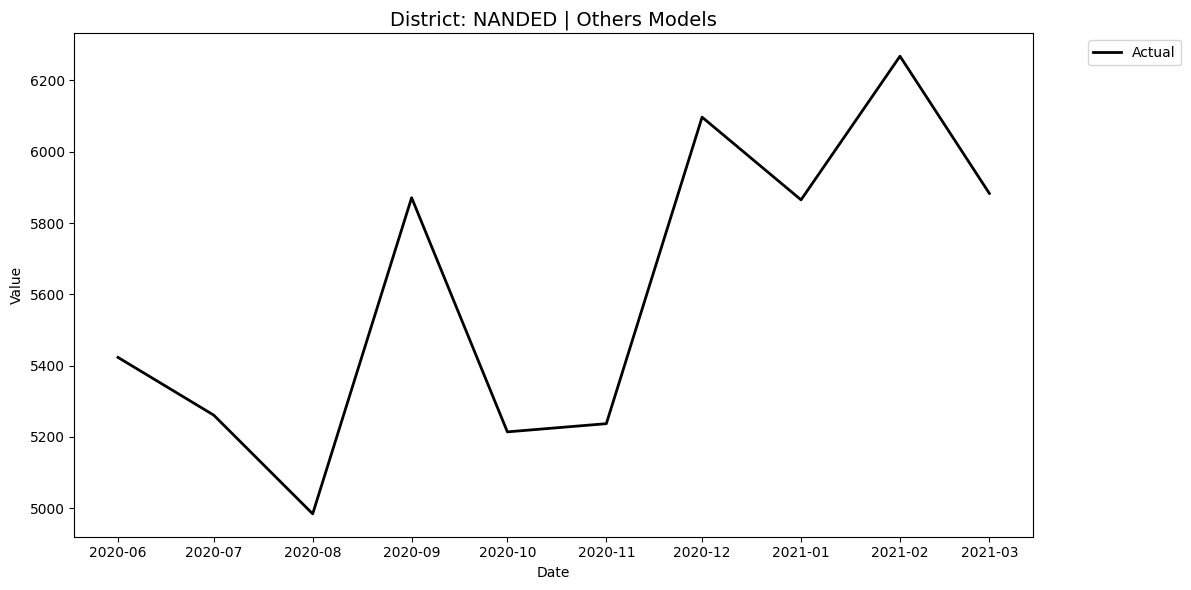

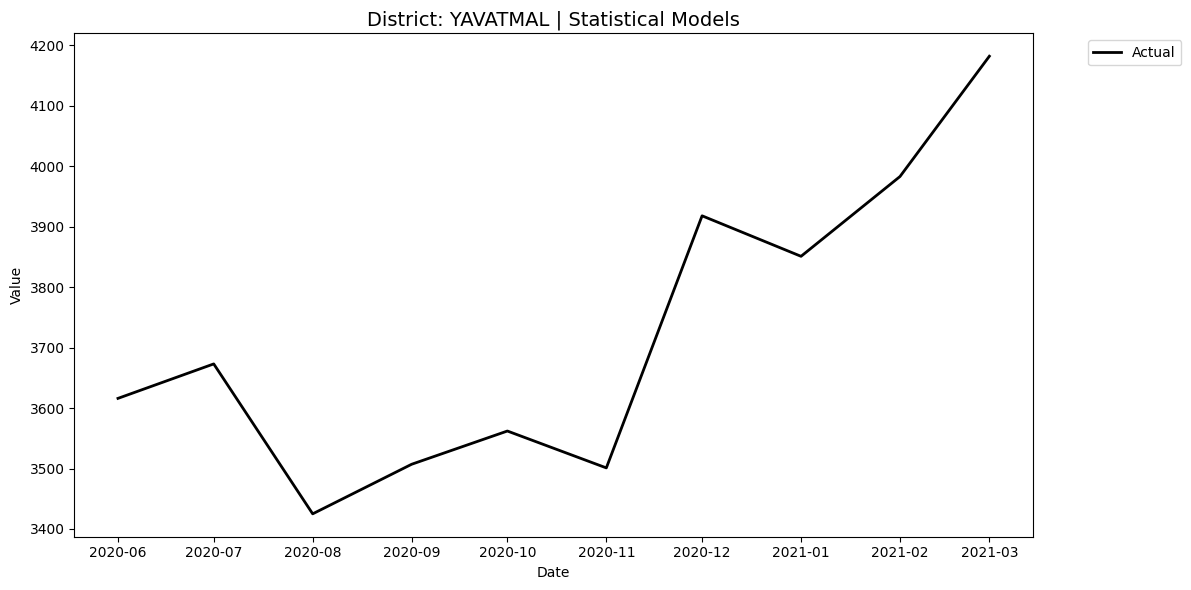

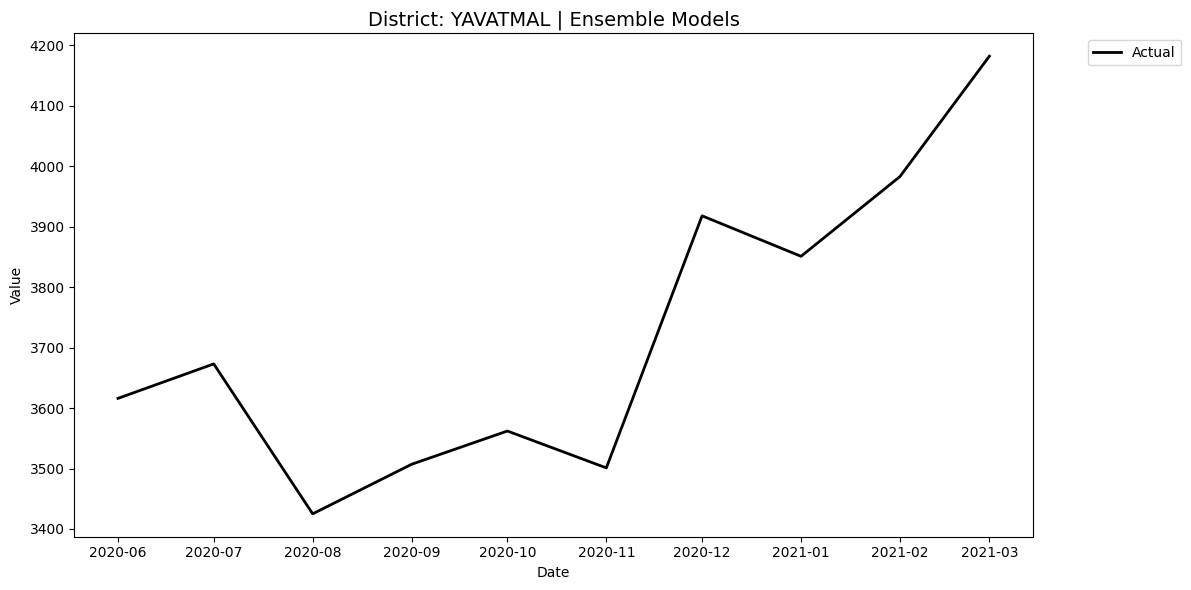

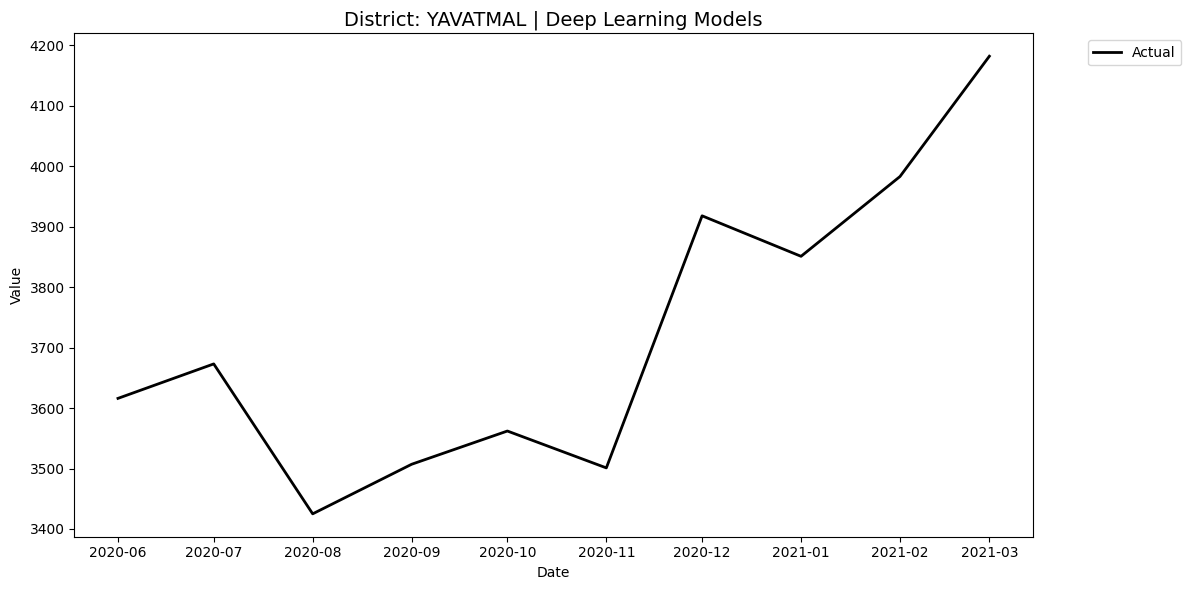

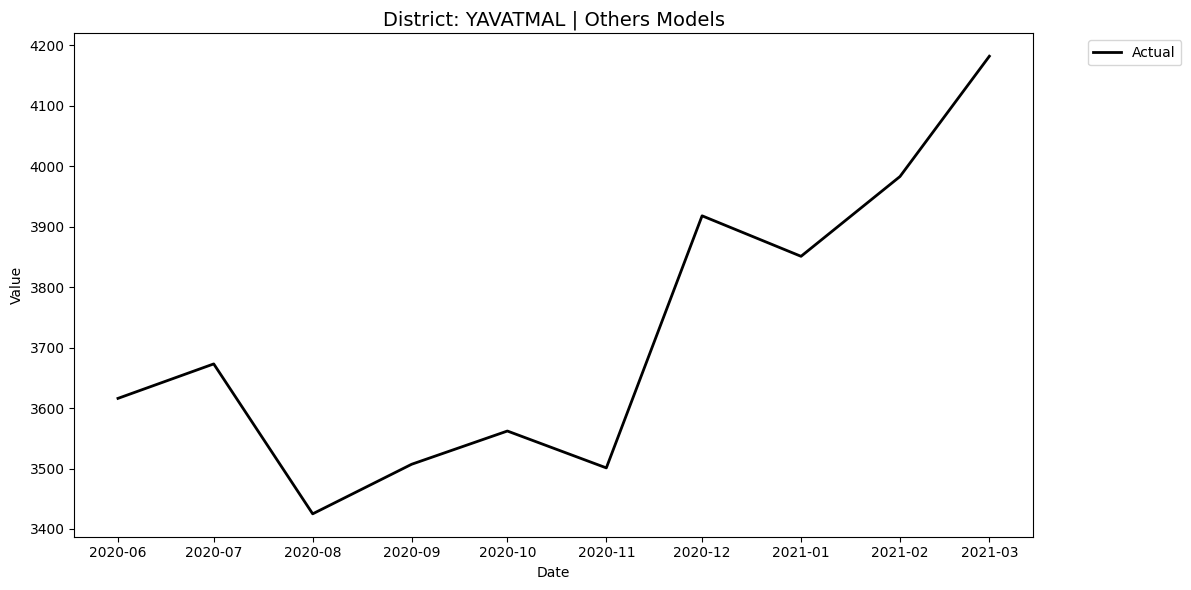

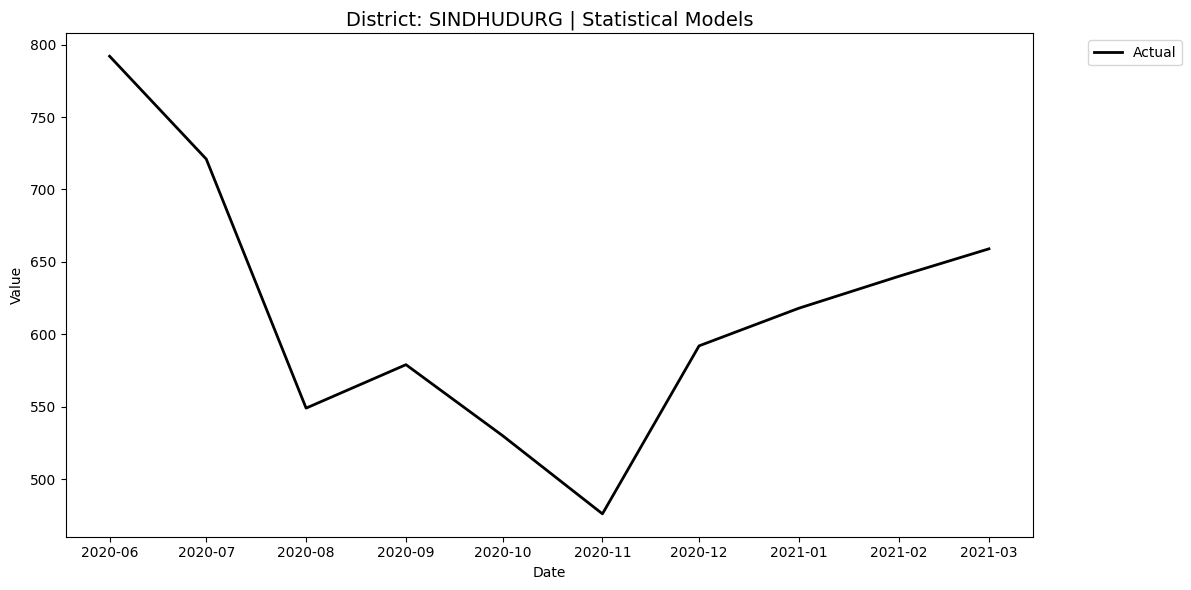

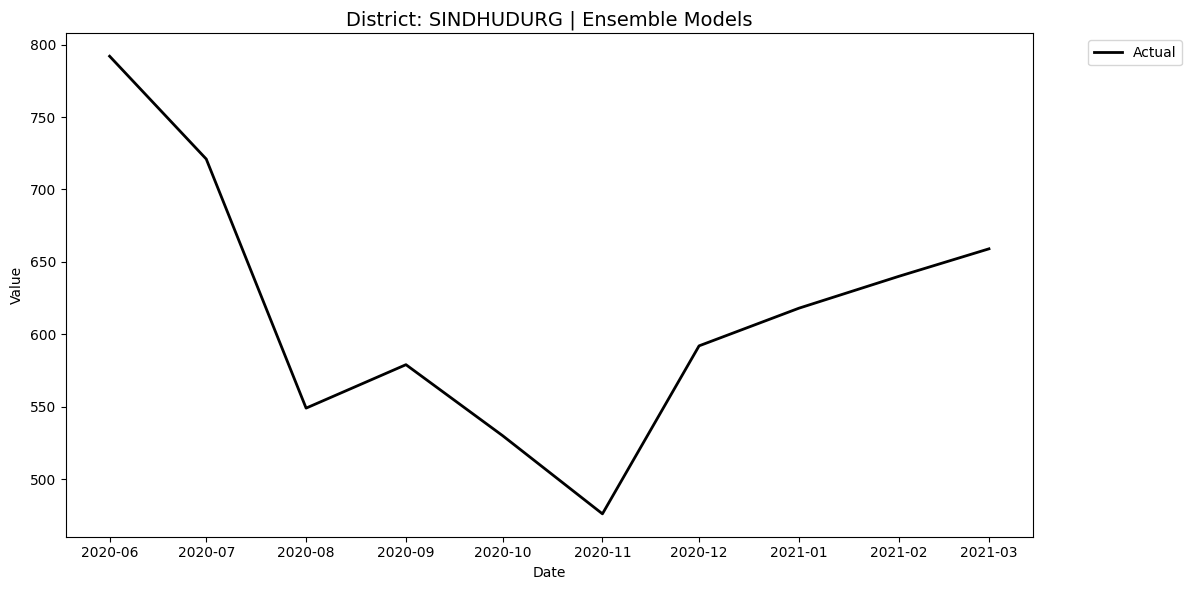

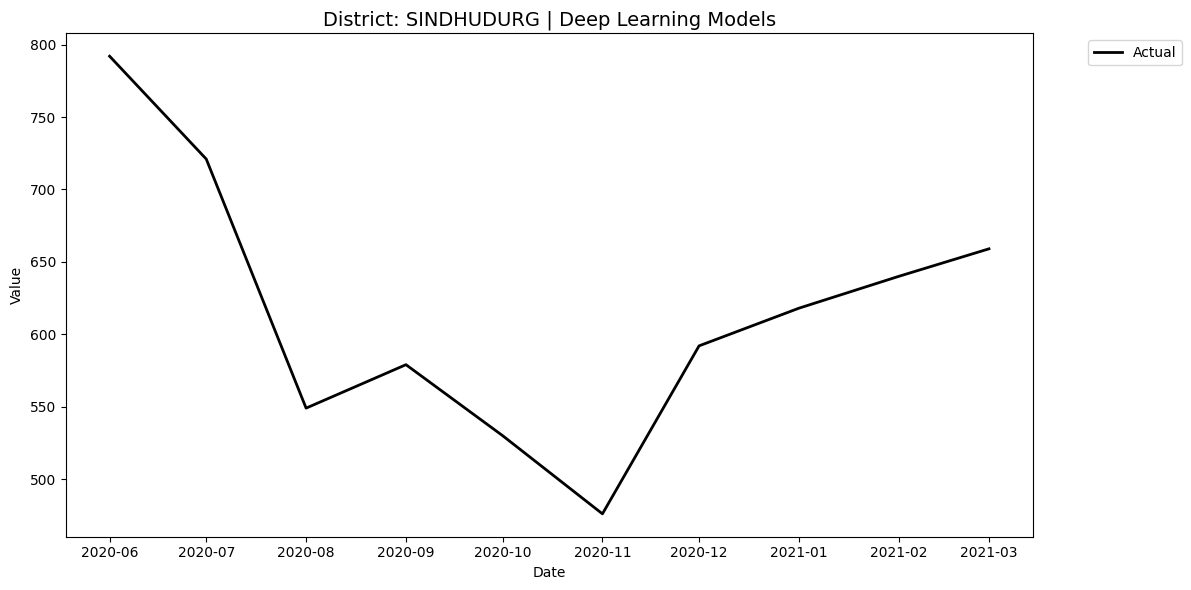

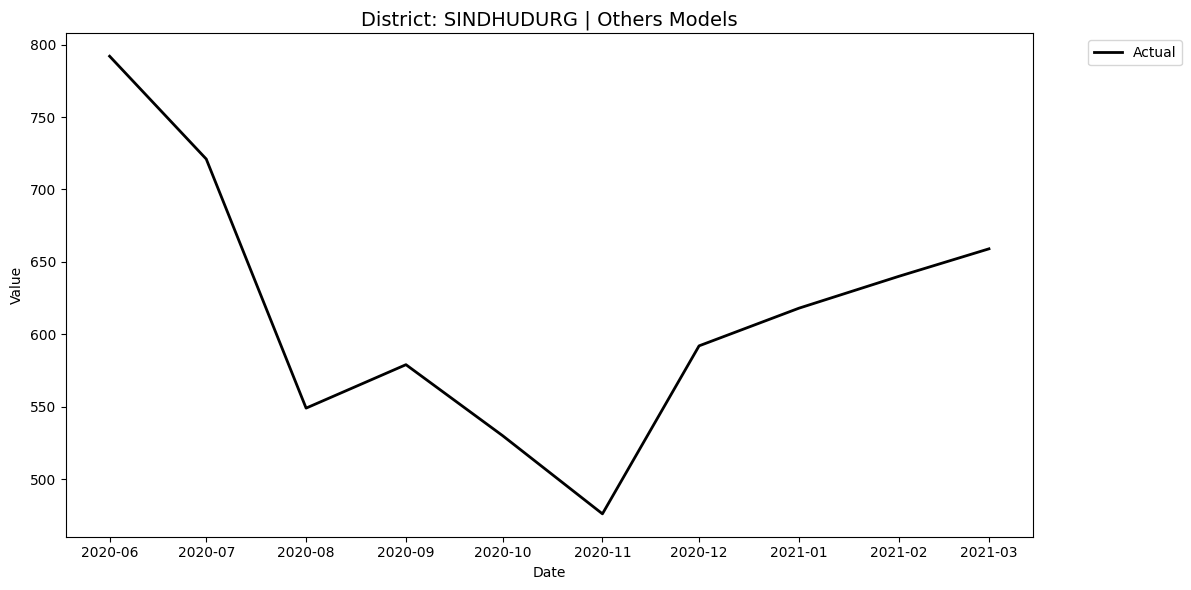

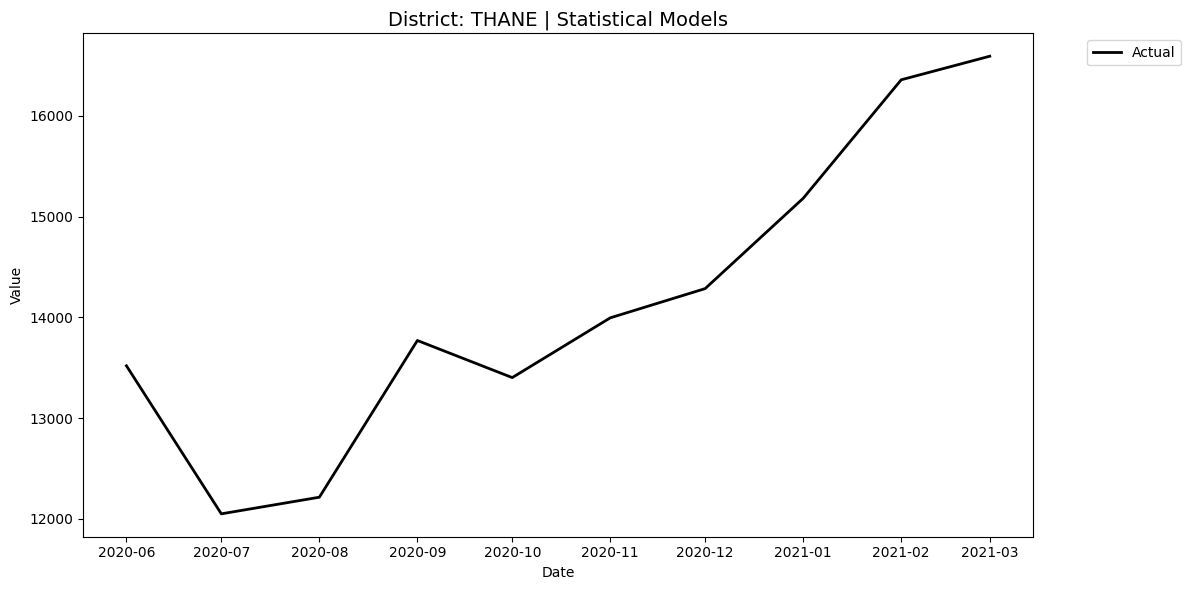

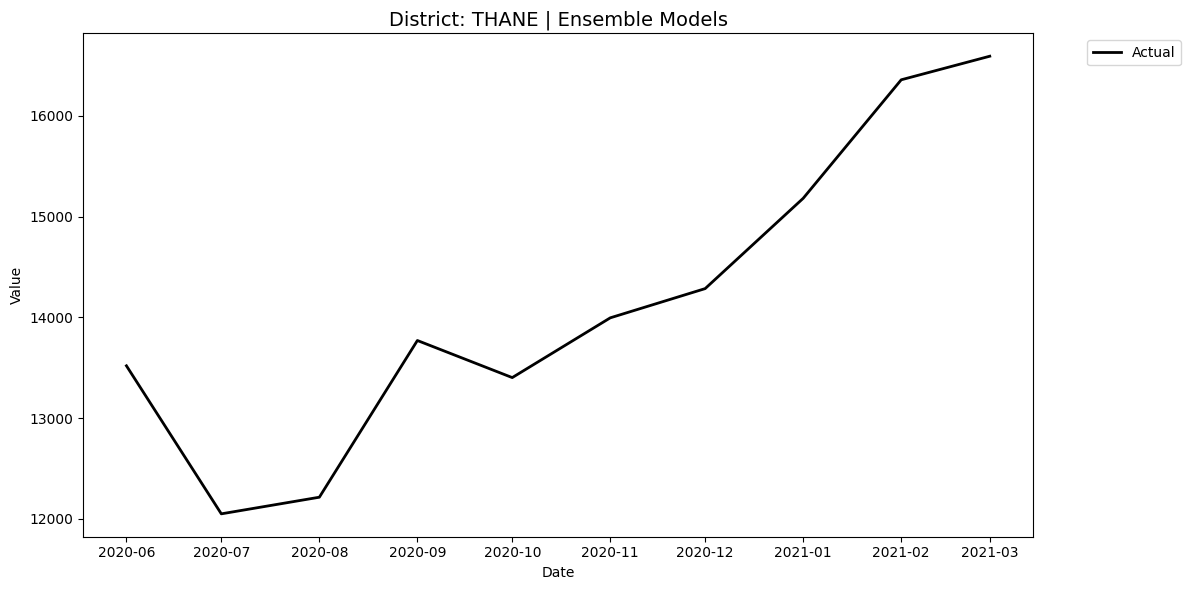

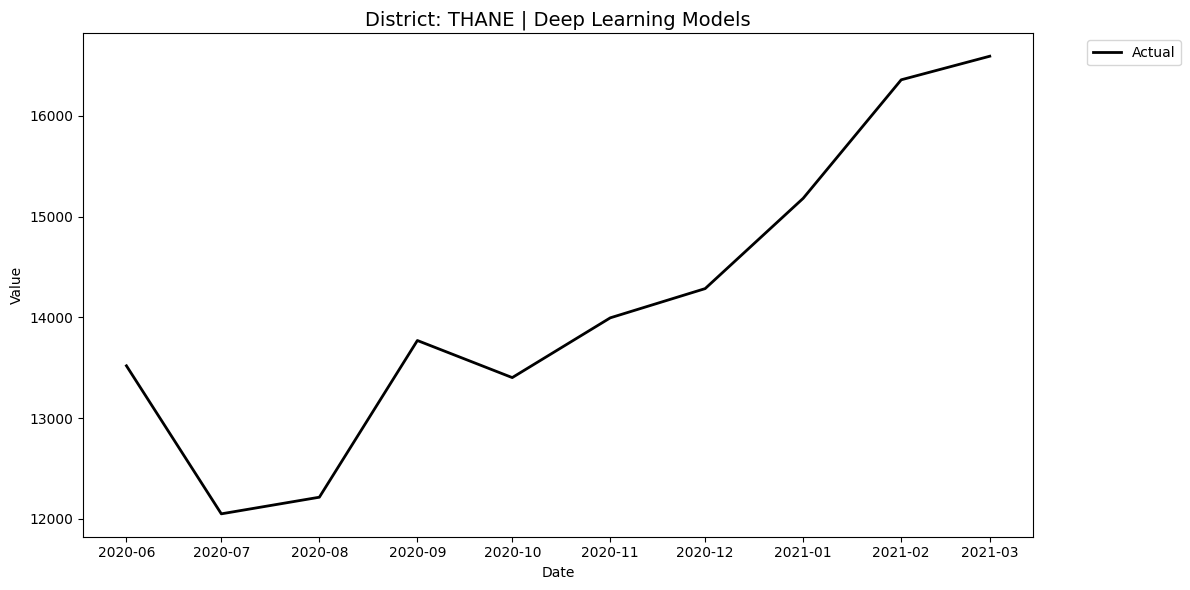

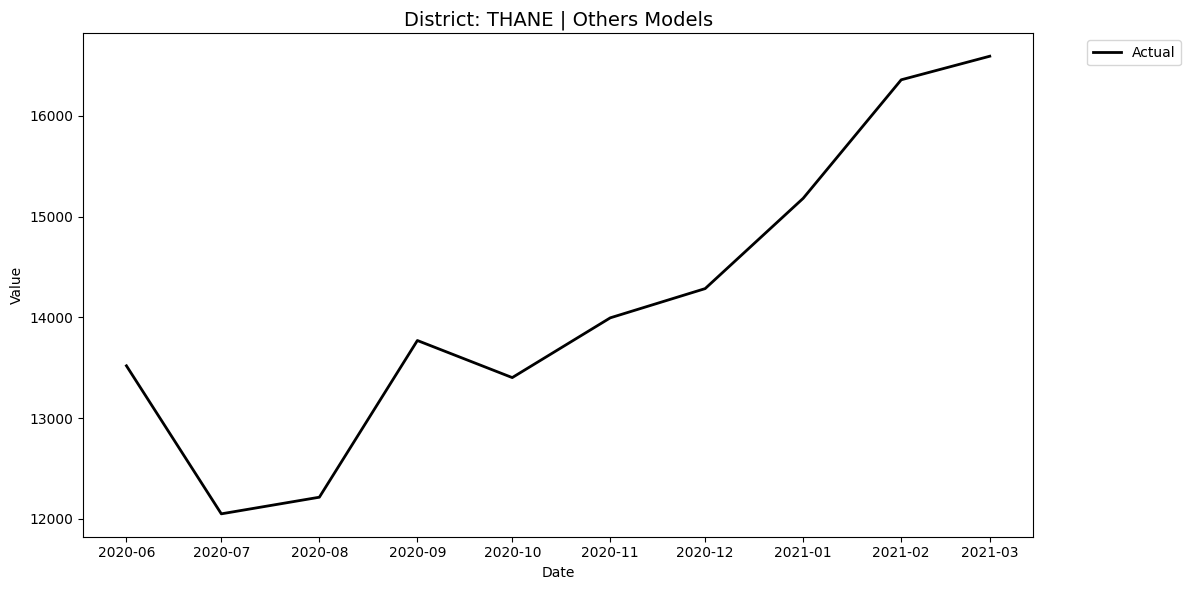

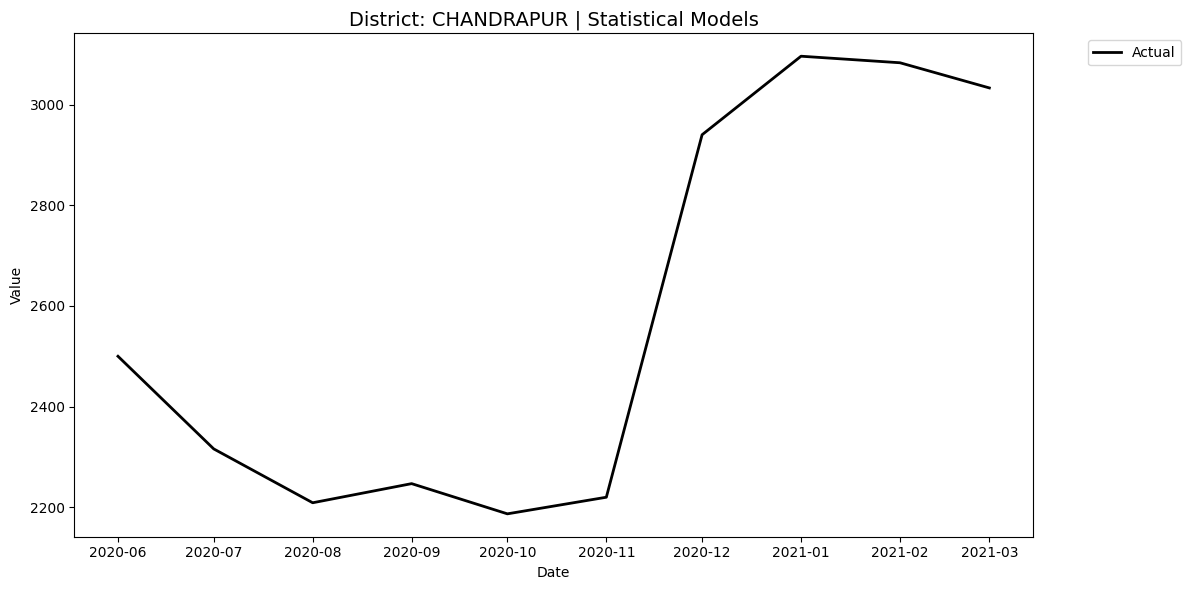

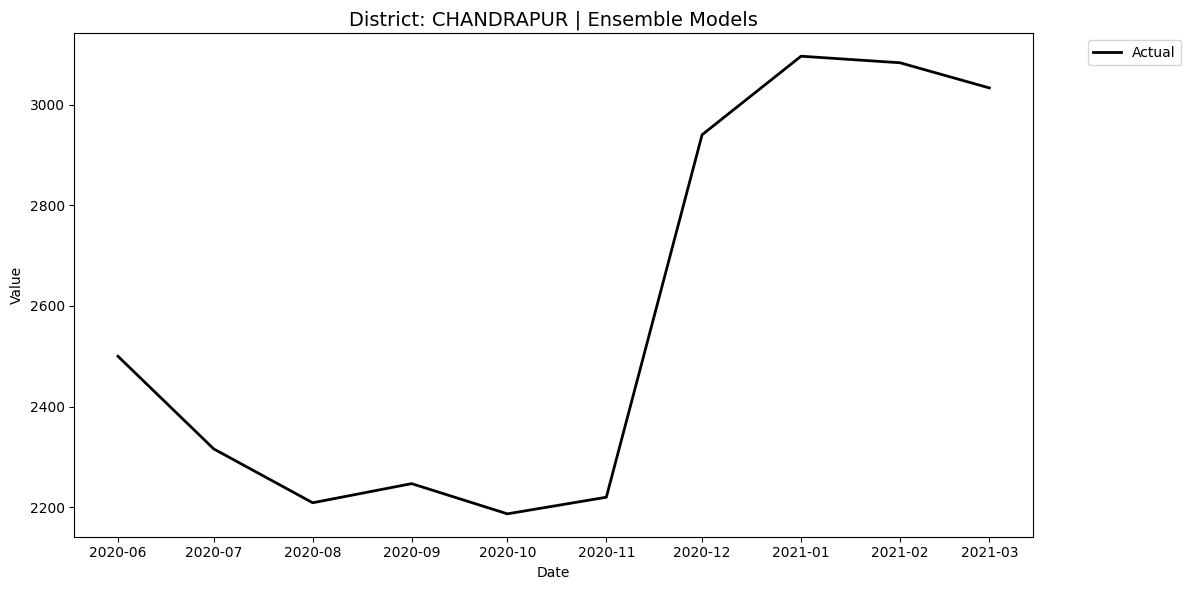

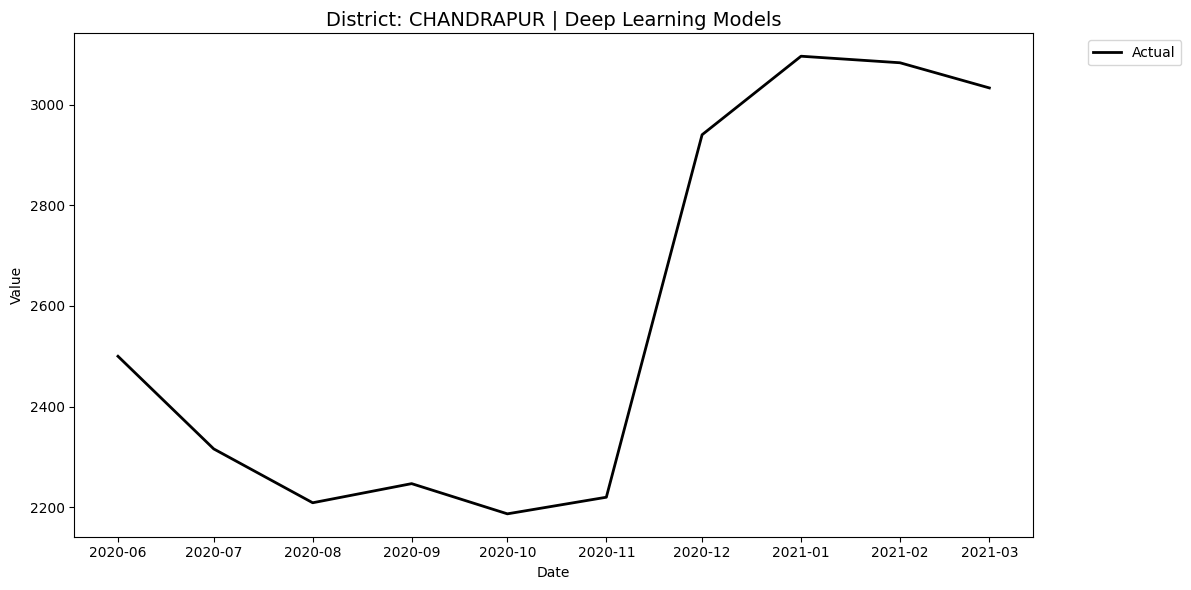

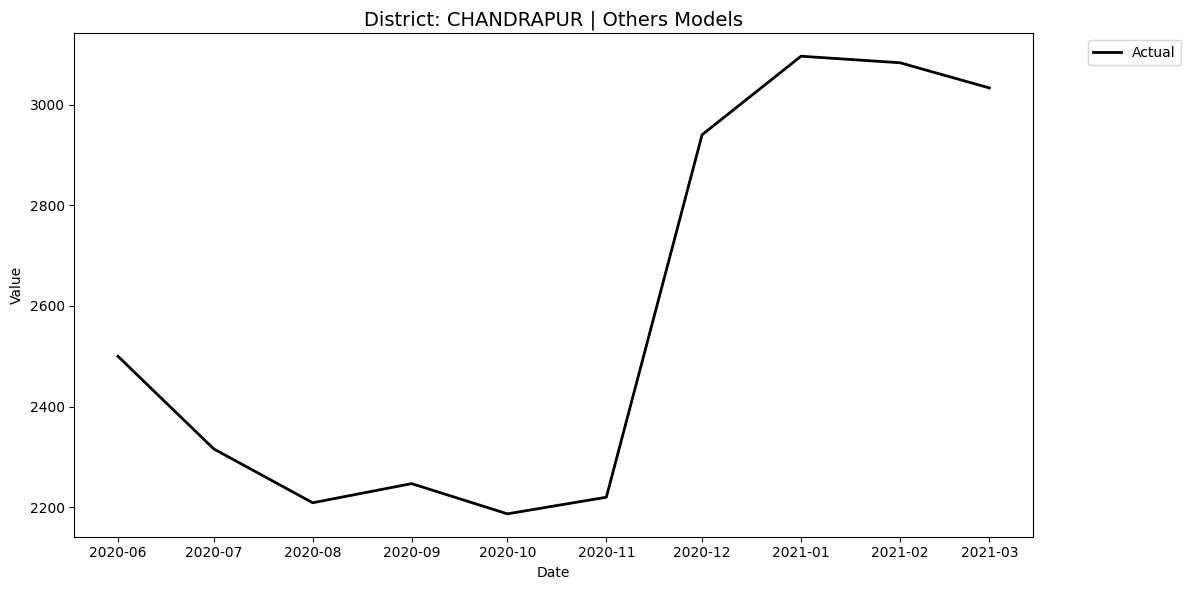

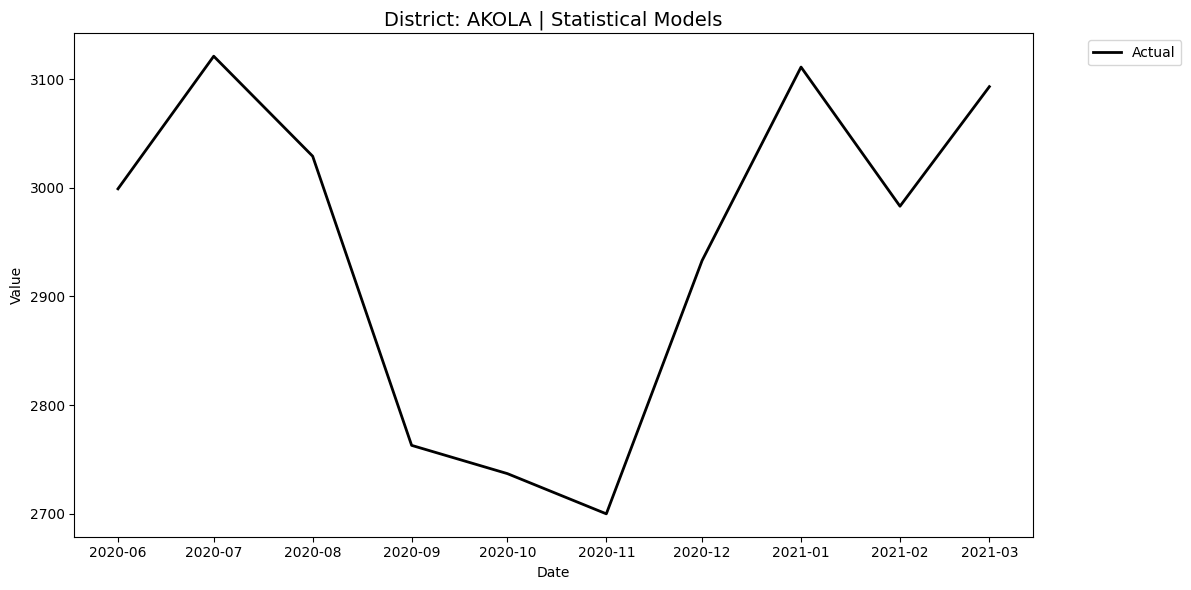

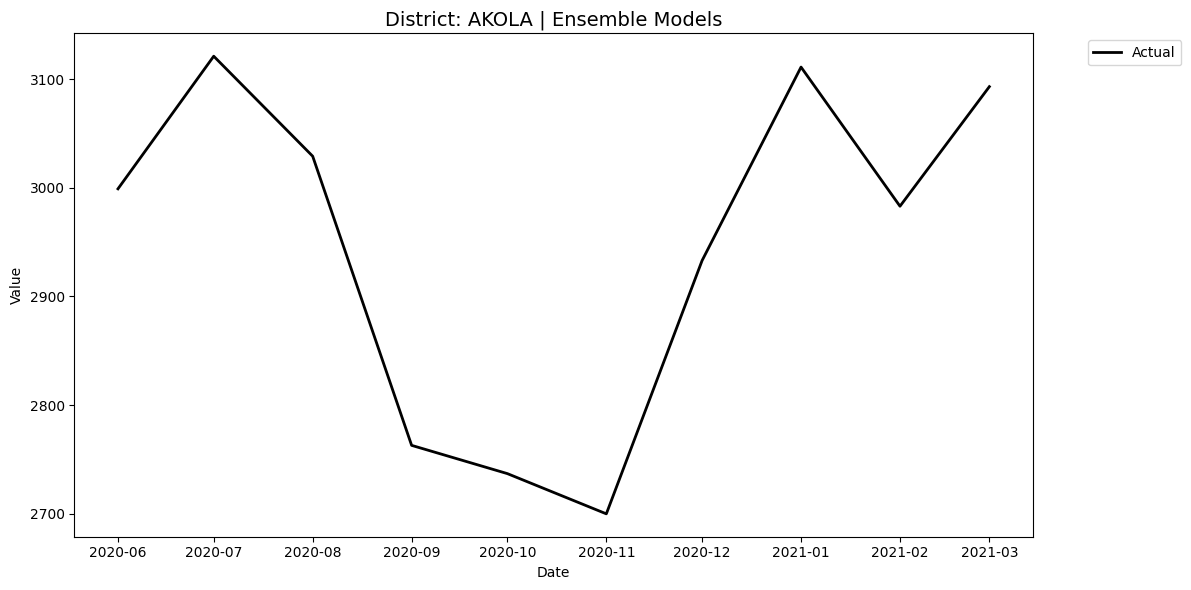

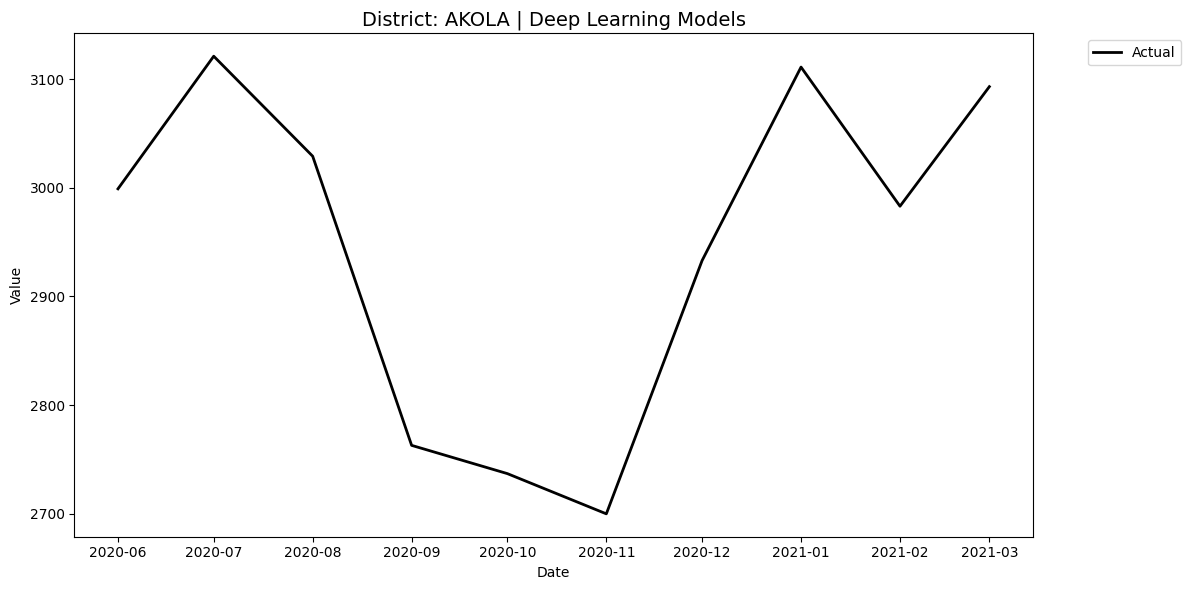

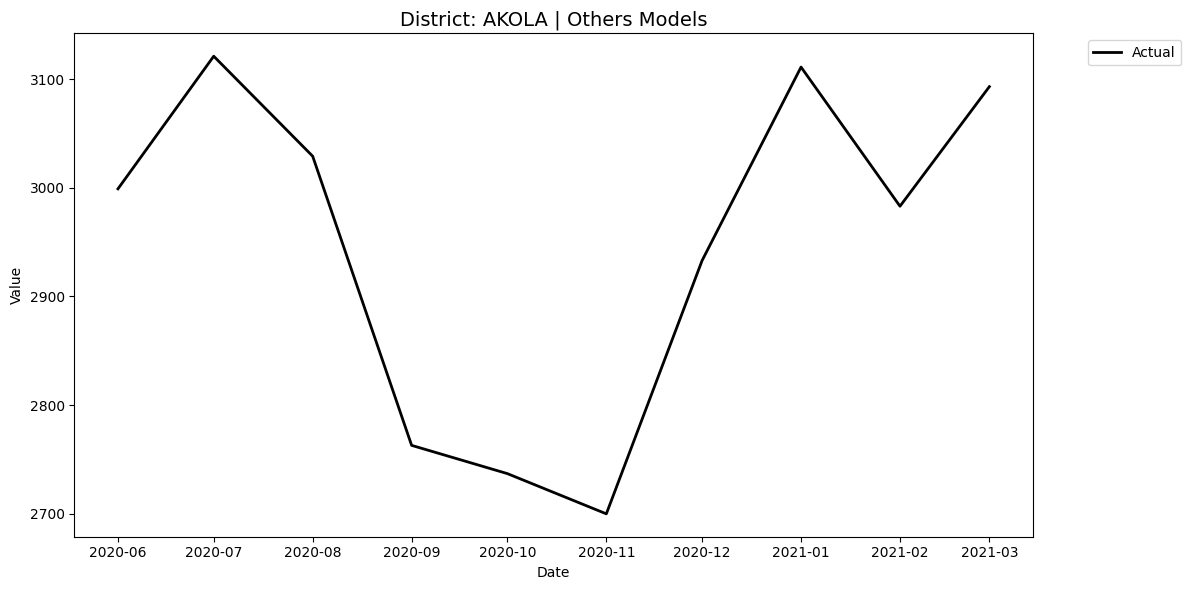

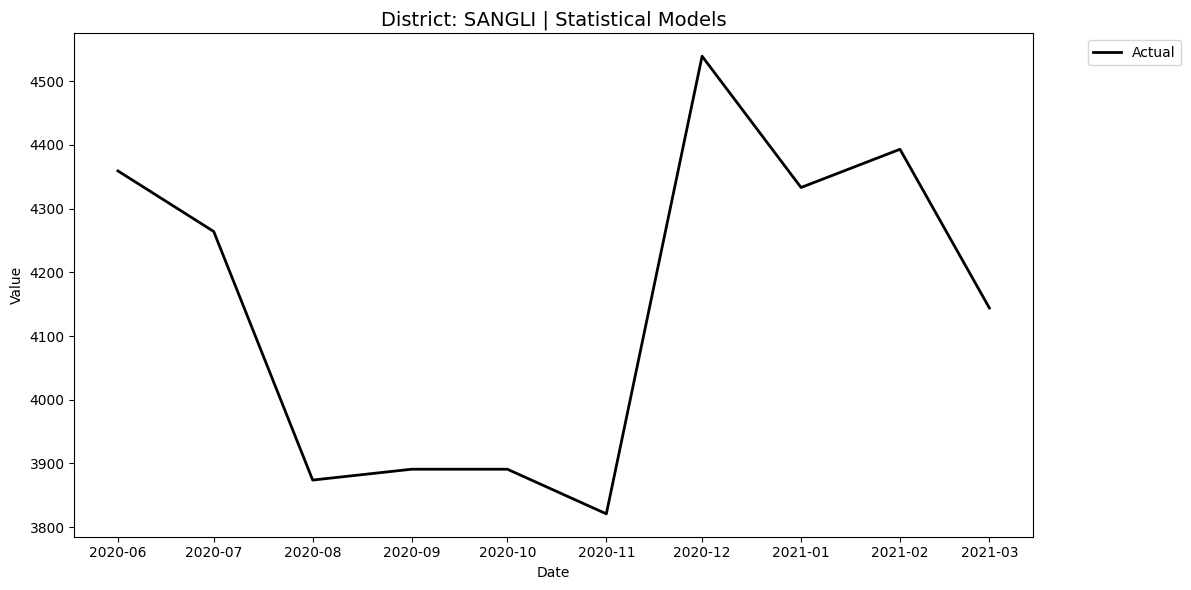

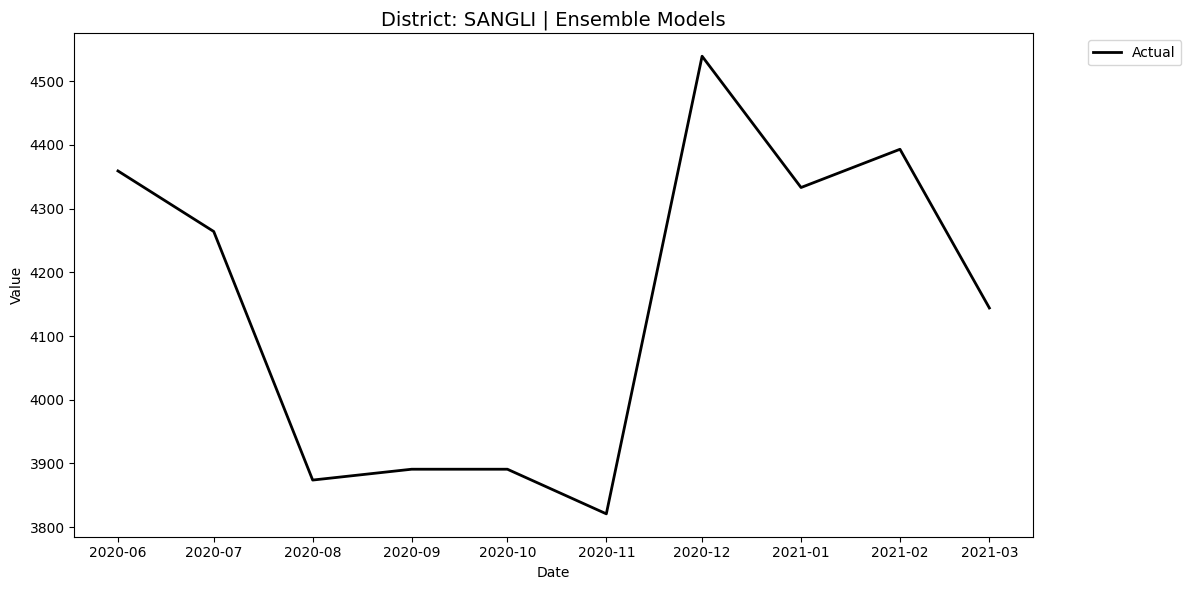

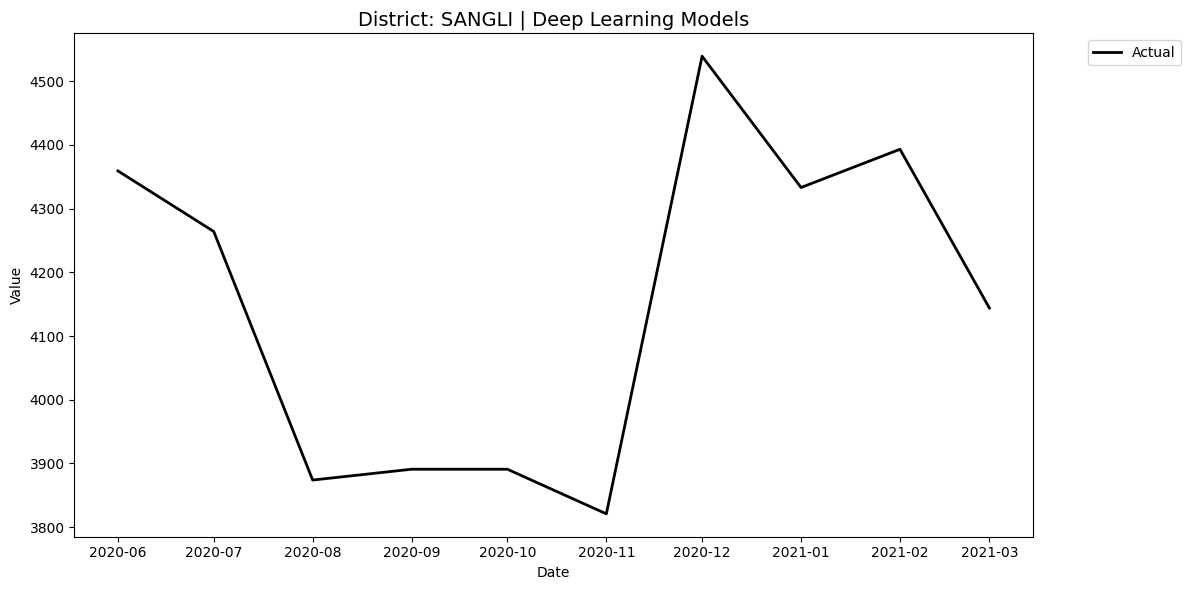

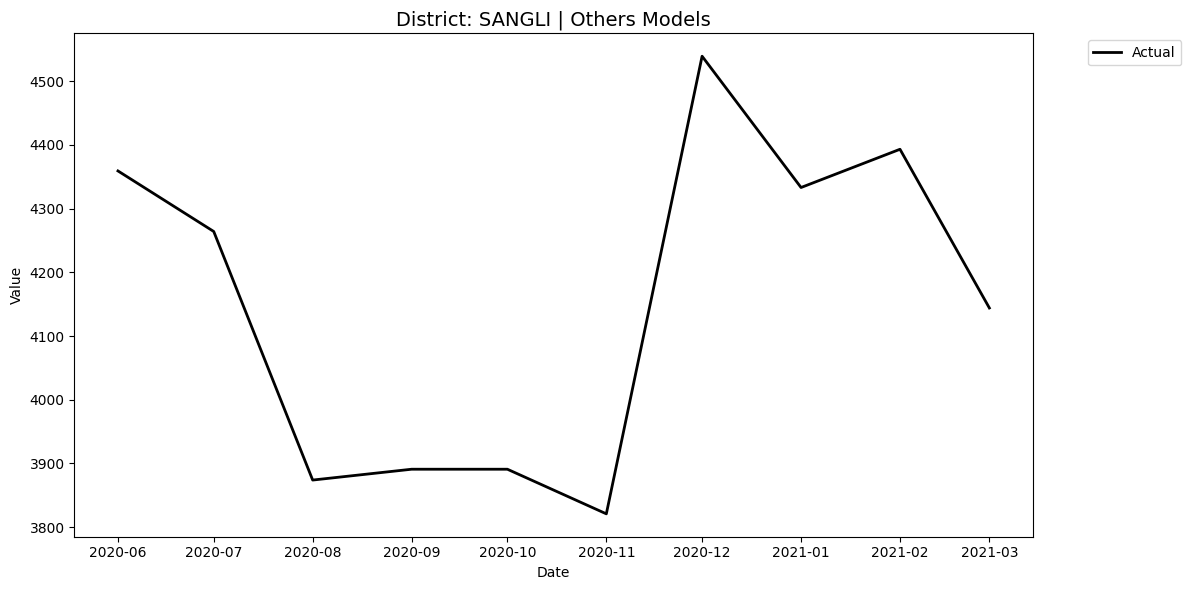

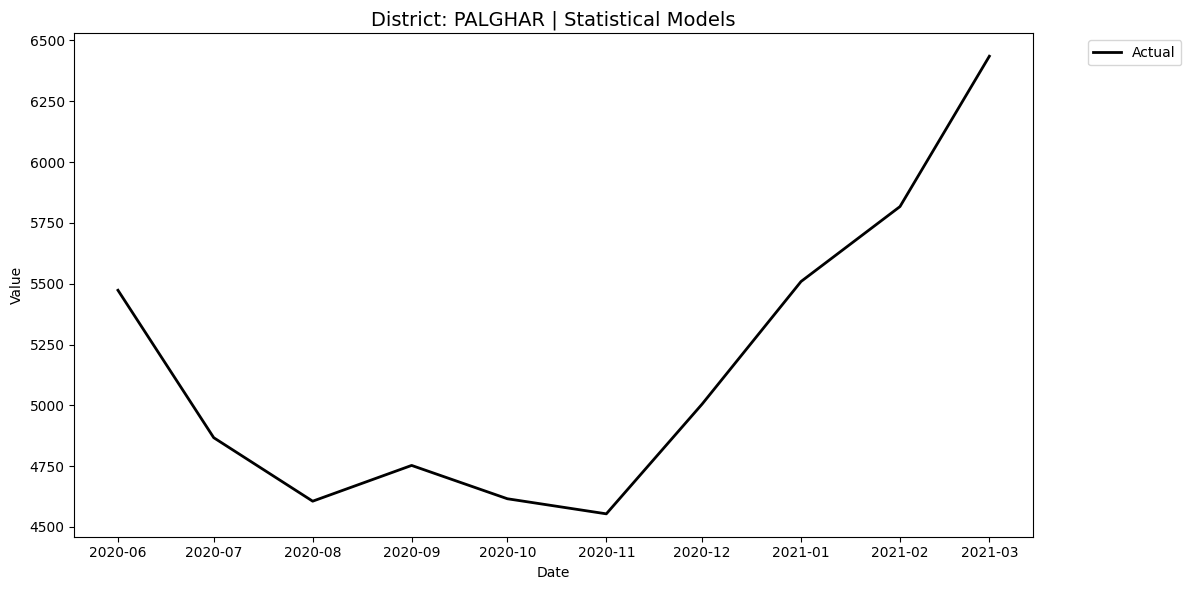

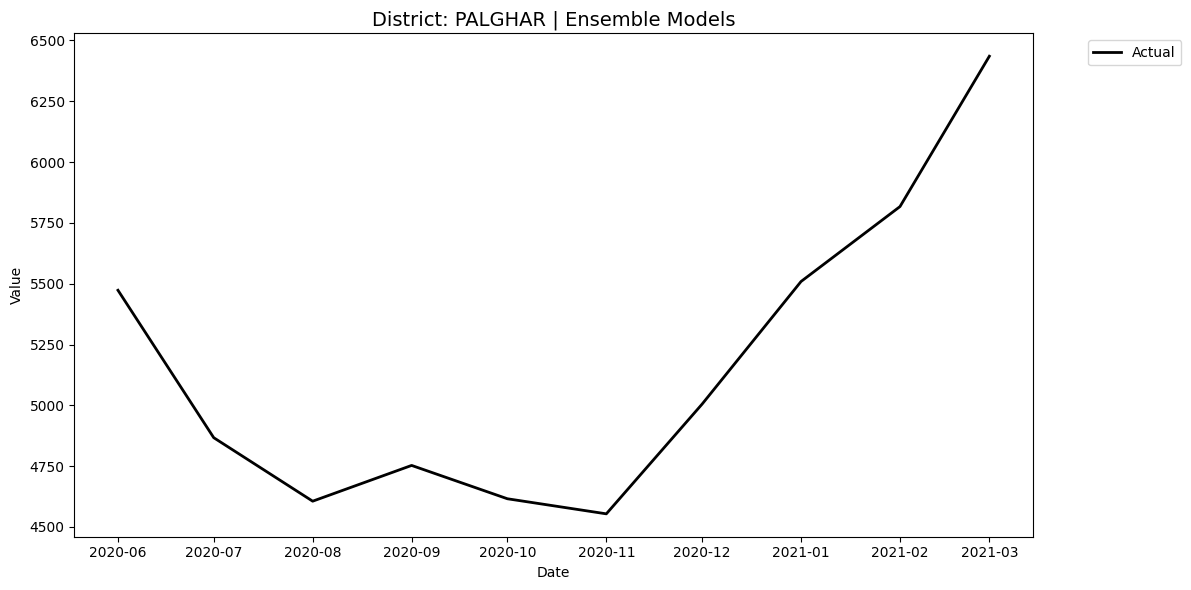

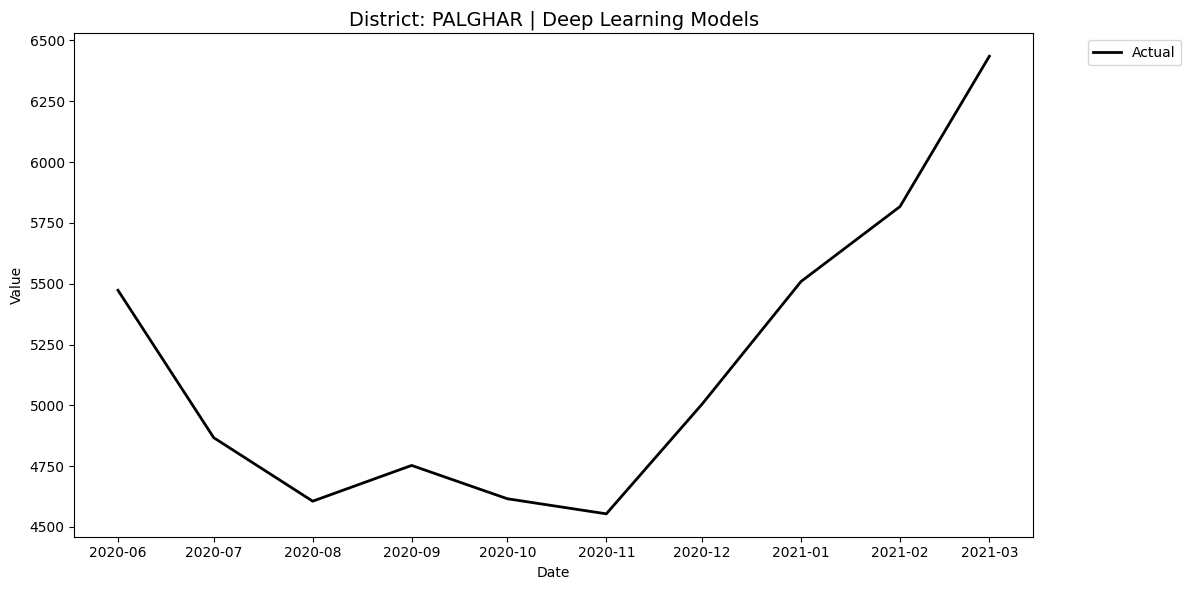

KeyboardInterrupt: 

In [53]:
districts = final_df['district'].unique()

for district in districts:
    district_df = final_df[final_df['district'] == district]

    # Take actual series only once
    actual_series = district_df[['date', 'actual']].drop_duplicates()

    for group_name, model_list in groups.items():
        plt.figure(figsize=(12, 6))

        # Plot actual line
        plt.plot(actual_series['date'], actual_series['actual'], label='Actual', color='black', linewidth=2)

        # Plot all models in that group
        for model in model_list:
            model_df = district_df[district_df['model'] == model]
            if not model_df.empty:
                plt.plot(model_df['date'], model_df['forecast'], label=model, alpha=0.7)

        plt.title(f"District: {district} | {group_name} Models", fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)  # Move legend outside
        plt.tight_layout()
        plt.show()


In [54]:
import numpy as np
import pandas as pd

# Assuming 'final_df' already loaded, with columns: ['district', 'date', 'actual', 'forecast', 'model']

# Empty list to collect results
results = []

districts = final_df['district'].unique()
models = final_df['model'].unique()

for district in districts:
    for model in models:
        temp_df = final_df[(final_df['district'] == district) & (final_df['model'] == model)]
        if not temp_df.empty:
            rmse = np.sqrt(((temp_df['forecast'] - temp_df['actual'])**2).mean())
            results.append({
                'district': district,
                'model': model,
                'RMSE': rmse
            })

# Create DataFrame
rmse_df = pd.DataFrame(results)

# Sort if you want
rmse_df = rmse_df.sort_values(by=['district', 'RMSE'])

# See top results
print(rmse_df.head())


       district    model        RMSE
432  AHMEDNAGAR      KNN  455.389627
426  AHMEDNAGAR  XGBOOST  480.646297
422  AHMEDNAGAR       ET  496.076295
424  AHMEDNAGAR     LSTM  507.959236
429  AHMEDNAGAR    LASSO  531.925517


In [60]:
rmse_df[rmse_df.district == "THANE"].sort_values(by='RMSE', ascending=True)

district       model          RMSE
330    THANE       HUBER   1147.354514
325    THANE          DT   1307.579363
326    THANE     XGBOOST   1319.408416
319    THANE      LINEAR   1342.879310
320    THANE  ELASTICNET   1342.880597
331    THANE          GB   1409.371862
324    THANE        LSTM   1453.480604
314    THANE       TBATS   1456.553498
316    THANE       ARIMA   1460.630597
322    THANE          ET   1520.248750
327    THANE    BAYESIAN   1539.748517
328    THANE          RF   1549.264863
332    THANE         KNN   1552.252990
315    THANE         EXP   1560.488858
323    THANE         ANN   1562.798541
317    THANE        LGBM   1592.825812
329    THANE       LASSO   1678.655104
321    THANE       RIDGE   1678.655593
333    THANE     PROPHET   1938.805921
318    THANE      SARIMA  13841.070297

In [61]:
final_df['model'].unique()

array(['TBATS', 'EXP', 'ARIMA', 'LGBM', 'SARIMA', 'LINEAR', 'ELASTICNET',
       'RIDGE', 'ET', 'ANN', 'LSTM', 'DT', 'XGBOOST', 'BAYESIAN', 'RF',
       'LASSO', 'HUBER', 'GB', 'KNN', 'PROPHET'], dtype=object)

district model         RMSE
415       AHMEDNAGAR   EXP   546.308875
355            AKOLA   EXP   309.378639
515         AMRAVATI   EXP   483.081906
79        AURANGABAD   EXP   570.641452
435             BEED   EXP  1048.571635
197         BHANDARA   EXP   266.081123
41          BULDHANA   EXP   375.068712
335       CHANDRAPUR   EXP   541.348835
99             DHULE   EXP   358.867026
159       GADCHIROLI   EXP   515.559893
139           GONDIA   EXP   305.605534
475          HINGOLI   EXP   124.282381
535          JALGAON   EXP   672.204756
673            JALNA   EXP   256.719733
177         KOLHAPUR   EXP   409.670488
633            LATUR   EXP   309.051493
555           MUMBAI   EXP  1612.739850
693  MUMBAI SUBURBAN   EXP    94.106044
1             NAGPUR   EXP  1203.121410
255           NANDED   EXP   418.031591
613        NANDURBAR   EXP   755.363478
593           NASHIK   EXP  1001.377752
21         OSMANABAD   EXP   407.287582
395          PALGHAR   EXP   721.463393
119         PARBHANI   EXP   348.606386
235             PUNE   EXP  1627.476759
61            RAIGAD   EXP   734.994061
495        RATNAGIRI   EXP   315.342913
375           SANGLI   EXP   321.372506
455           SATARA   EXP   496.540736
295       SINDHUDURG   EXP   107.722255
215          SOLAPUR   EXP   540.379680
315            THANE   EXP  1560.488858
573           WARDHA   EXP   213.219631
653           WASHIM   EXP   144.305594
275         YAVATMAL   EXP   284.138214

In [66]:
pivot_df = rmse_df.pivot(index='district', columns='model', values='RMSE')
print(pivot_df)

model                    ANN        ARIMA     BAYESIAN            DT  \
district                                                               
AHMEDNAGAR        696.999149   546.308856   547.094447    680.219744   
AKOLA             266.117705   284.176113   277.445042    274.385090   
AMRAVATI          431.609177   472.281209   426.503318    361.057257   
AURANGABAD        579.602831   629.832046   400.276506    511.050212   
BEED              600.254253   453.447573   280.911221    945.782717   
BHANDARA                 NaN   117.589124   213.667386    345.291067   
BULDHANA          287.881164   361.922044   368.447080    452.728151   
CHANDRAPUR        206.417881   399.417906   237.948697    410.512764   
DHULE             319.616683   403.910176   375.369294    418.684448   
GADCHIROLI               NaN   347.797524   333.999578    362.235533   
GONDIA            112.398427   212.153526   163.339502    132.220549   
HINGOLI           125.122907   123.844497   131.032571    192.04

In [68]:
pivot_df.to_csv('I1_rmse_pivot.csv', index=True)

In [71]:
# Get the best model for each district (lowest RMSE)
best_models = rmse_df.loc[rmse_df.groupby('district')['RMSE'].idxmin()]

# Display the result
best_models[['district', 'model', 'RMSE']].to_csv('I1_best_models.csv', index=False)